<a href="https://colab.research.google.com/github/anagabyfuentes/ProyectoIntegrador_Mermas/blob/main/Estadisticas_descriptivas_corregido_%26_Avance_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import boxcox

,Year,Cajas,Kilos,Importe_Venta
count,3441.000000,3441.000000,3441.000000,3441.0
mean,2023.070619,120.402209,19.816434,0.0
std,0.797496,369.362782,407.874704,0.0
min,2022.000000,0.000000,0.000000,0.0
25%,2022.000000,5.000000,0.000000,0.0
50%,2023.000000,28.000000,0.000000,0.0
75%,2024.000000,90.000000,0.000000,0.0
max,2024.000000,7505.000000,22418.000000,0.0


,Month,Source,Producto,Etiqueta,Tamaño,Color,Origen
count,3441,3441,3441,3441,3441,546,3441
unique,12,2,24,266,53,11,2
top,Junio,bod,Tomate Saladete,GENERICA,LG,COLOR 4,Bodega
freq,371,2916,2124,430,529,199,2916


,0
Color,84.13252
Month,0.00000
Year,0.00000
Source,0.00000
Producto,0.00000
Etiqueta,0.00000
Tamaño,0.00000
Cajas,0.00000
Kilos,0.00000
Importe_Venta,0.00000


,0
Year,0.0
Month,0.0
Source,0.0
Producto,0.0
Etiqueta,0.0
Tamaño,0.0
Cajas,0.0
Kilos,0.0
Importe_Venta,0.0
Origen,0.0


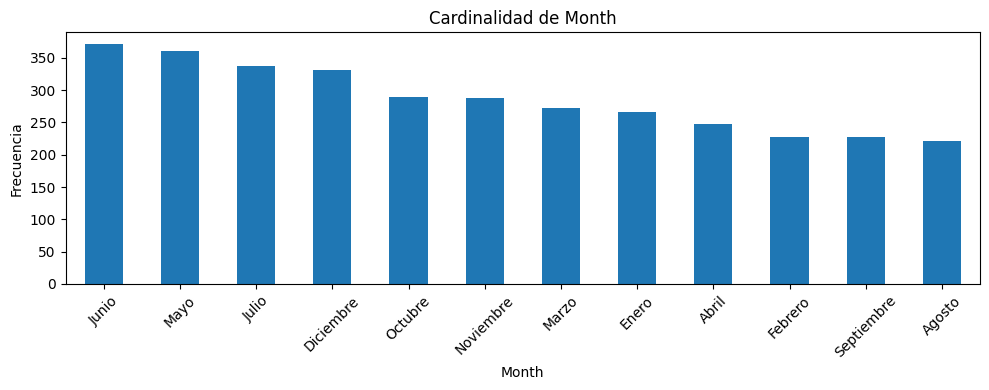

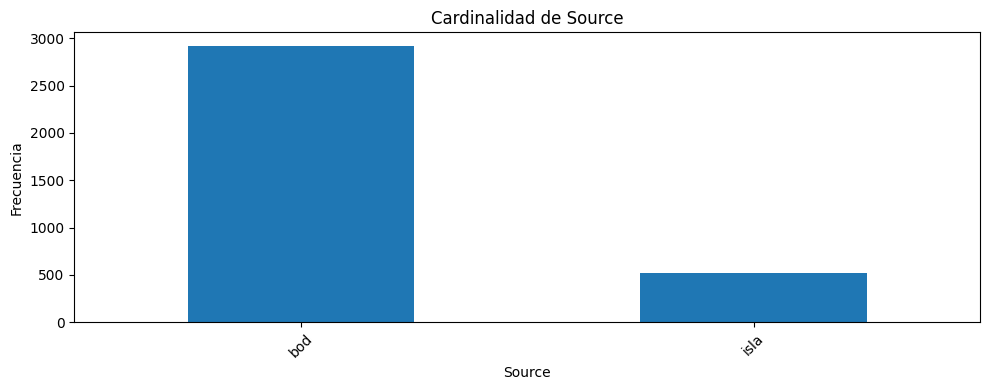

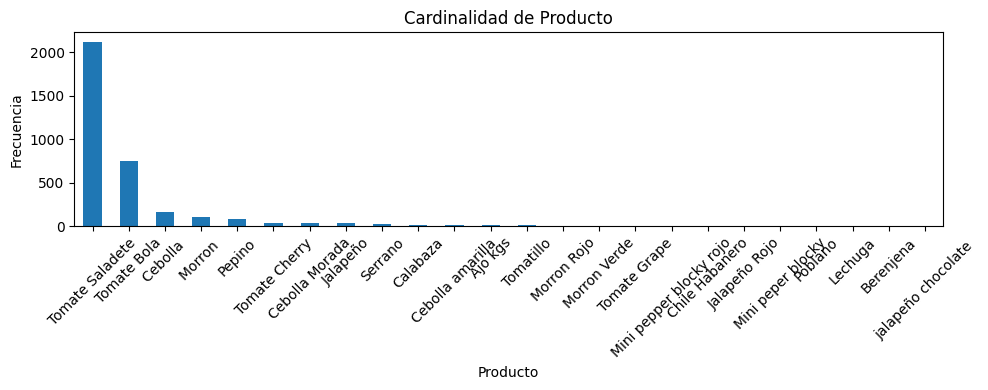

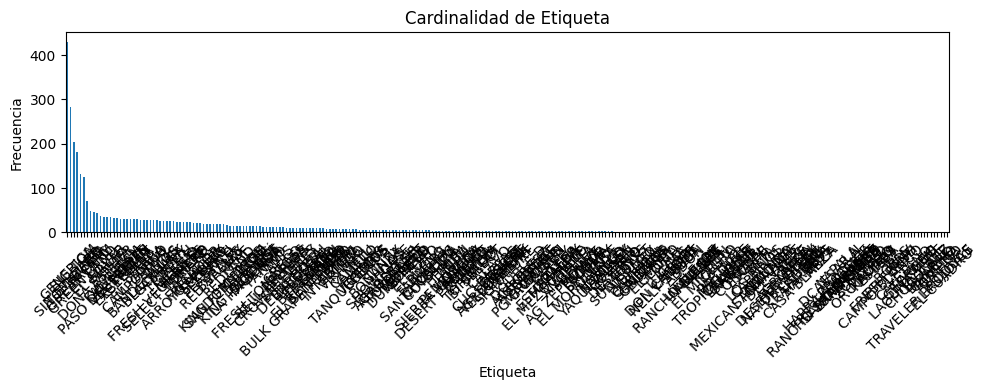

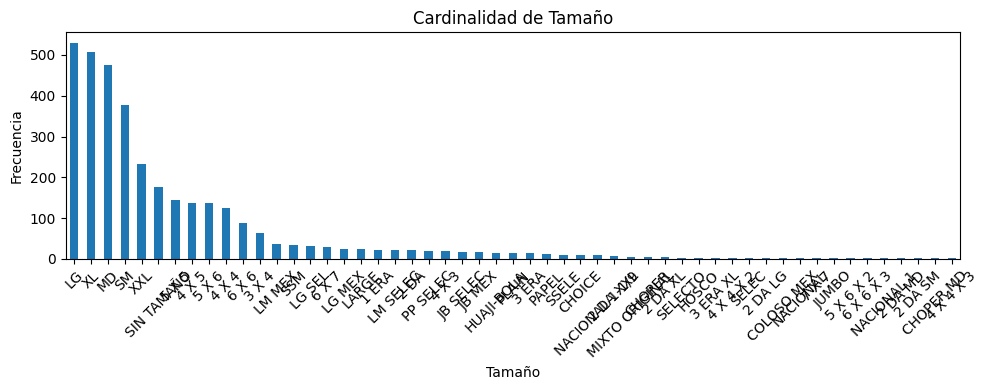

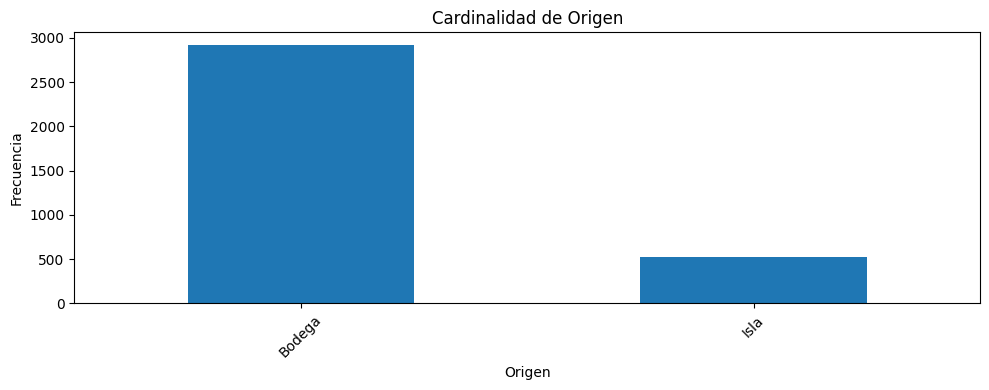

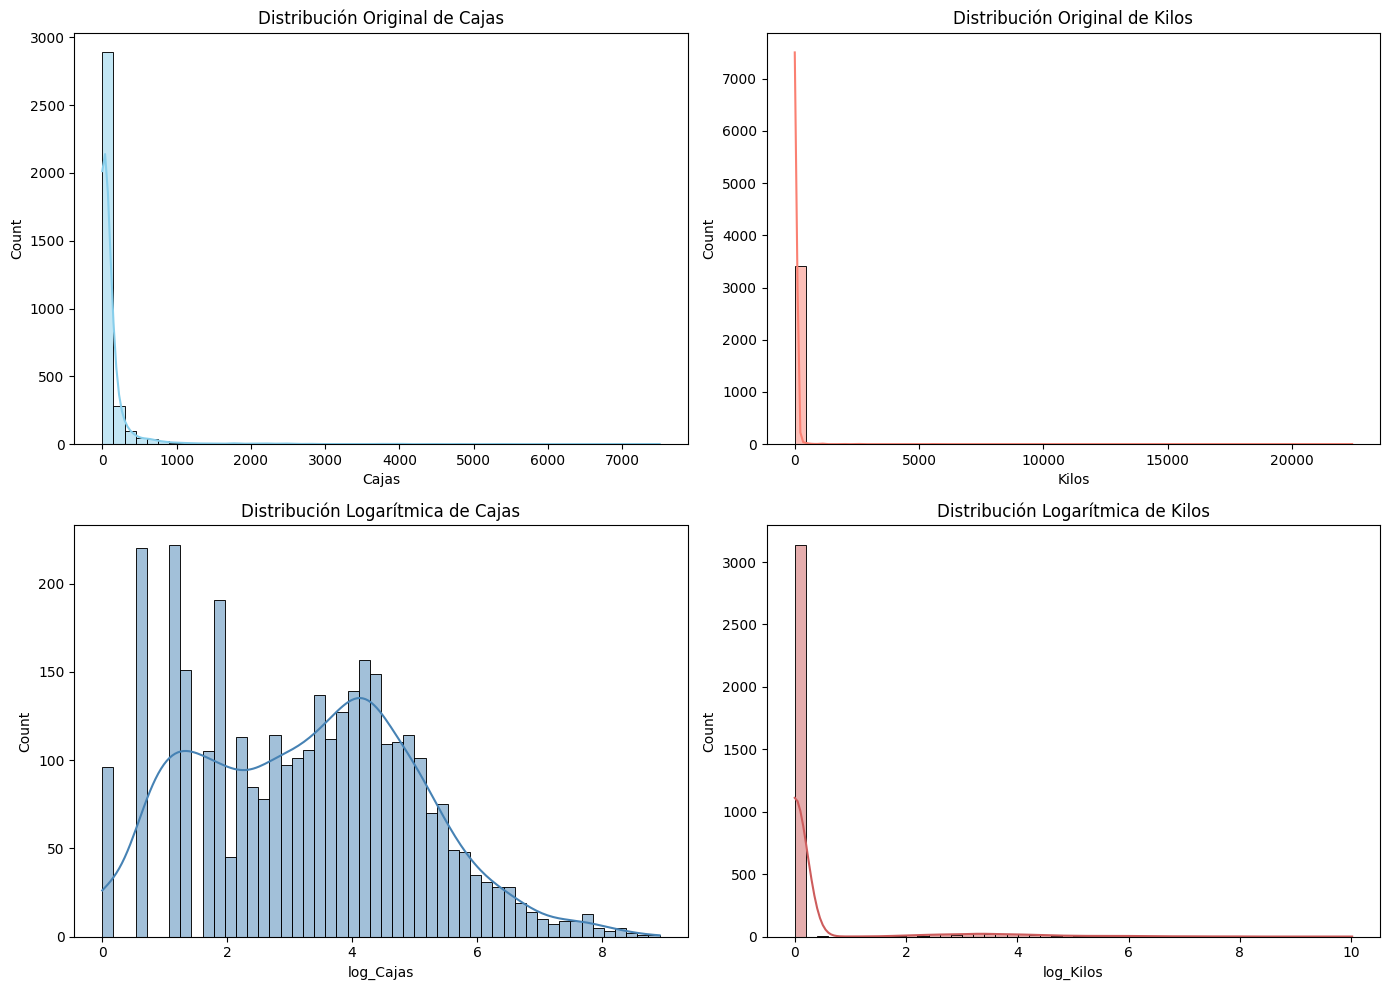

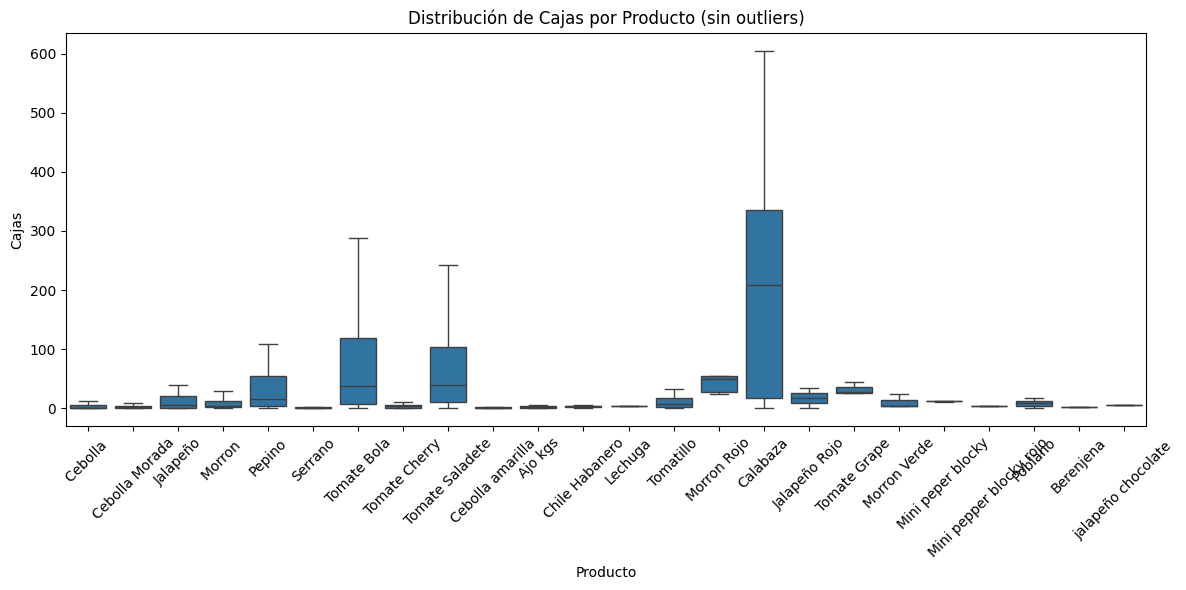

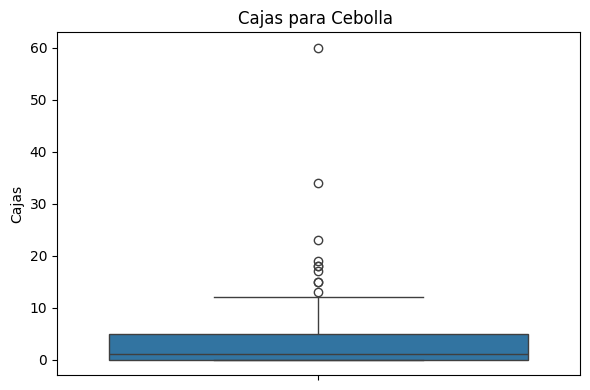

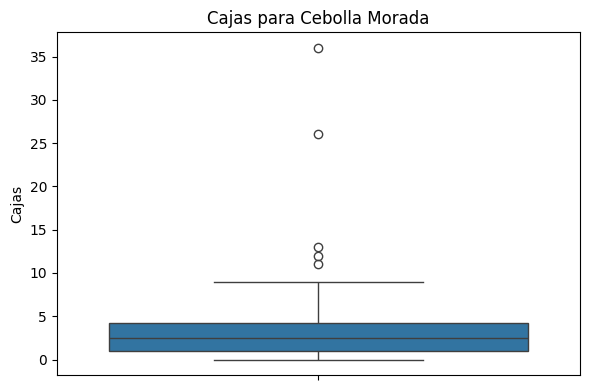

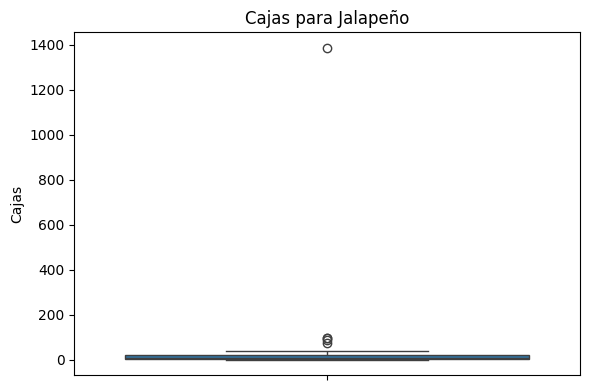

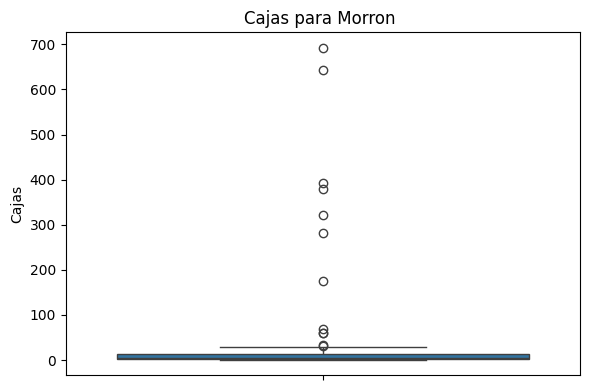

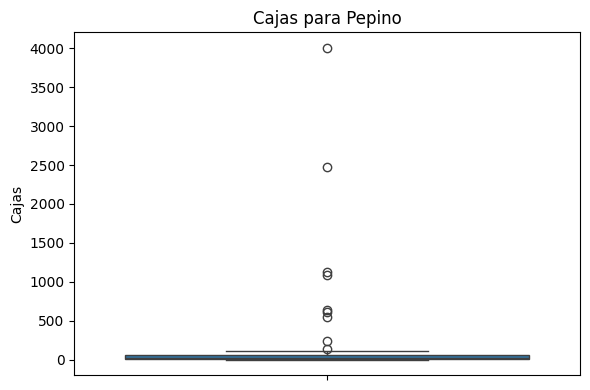

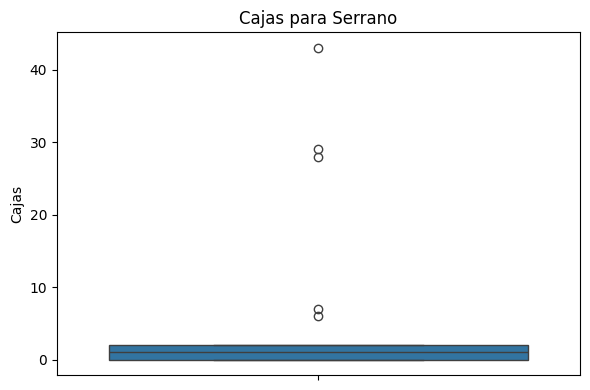

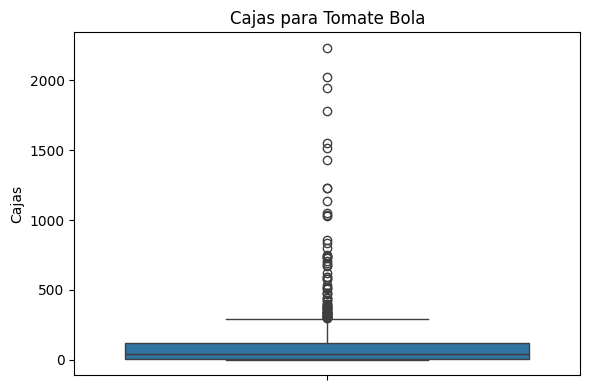

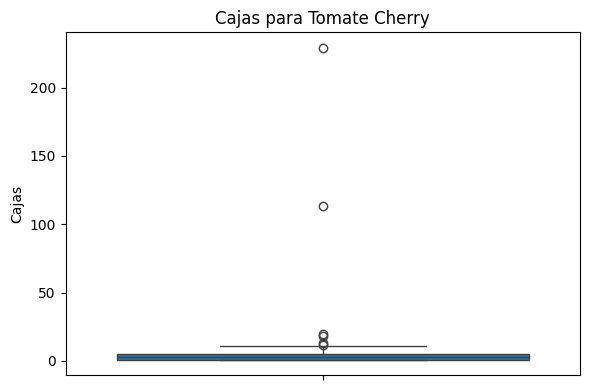

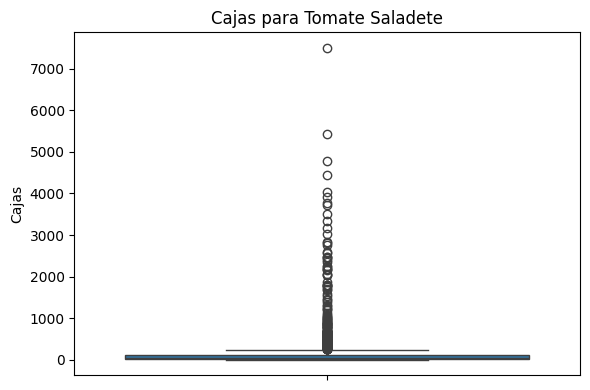

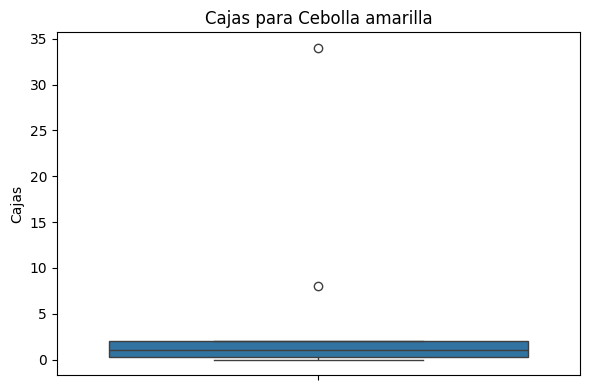

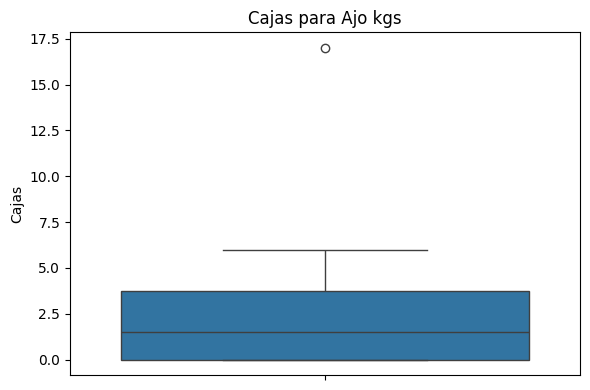

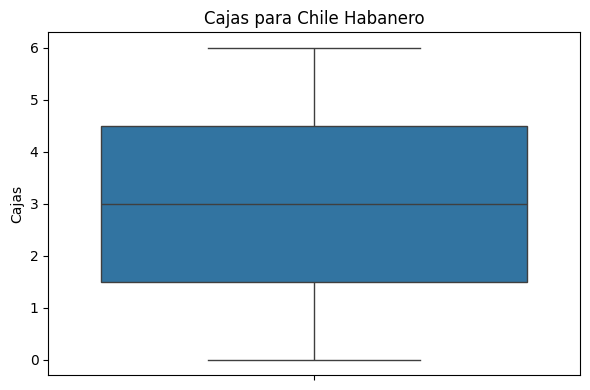

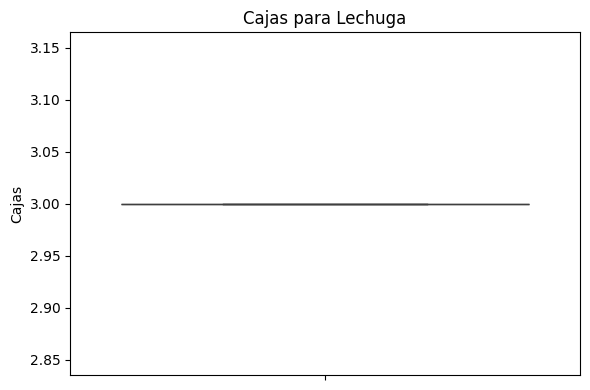

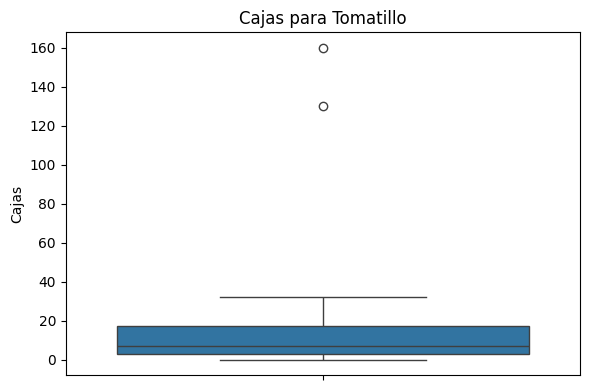

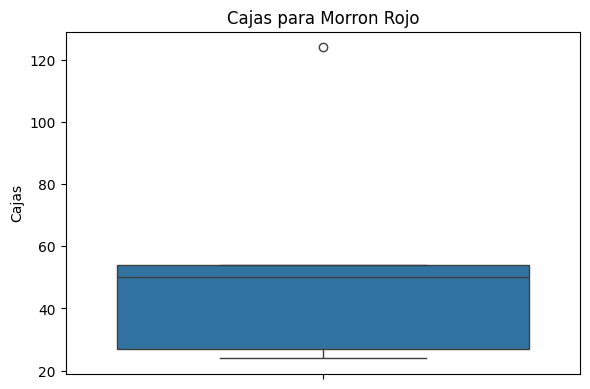

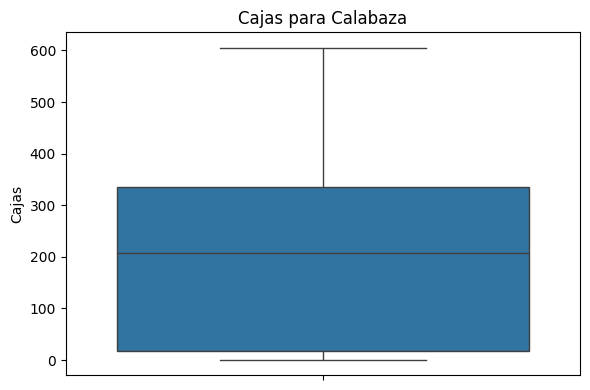

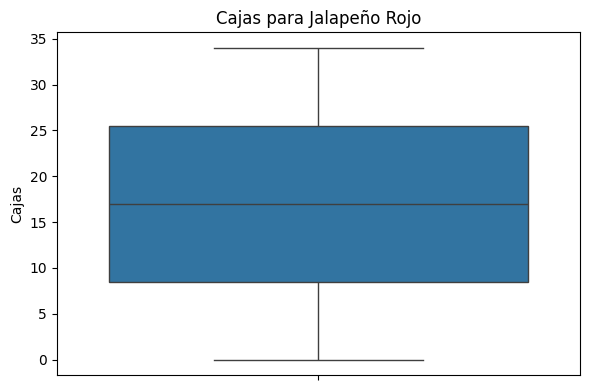

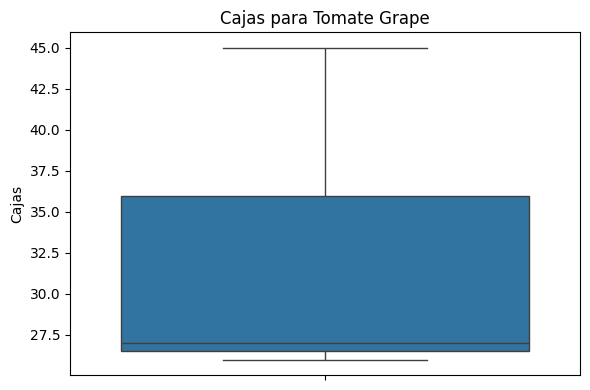

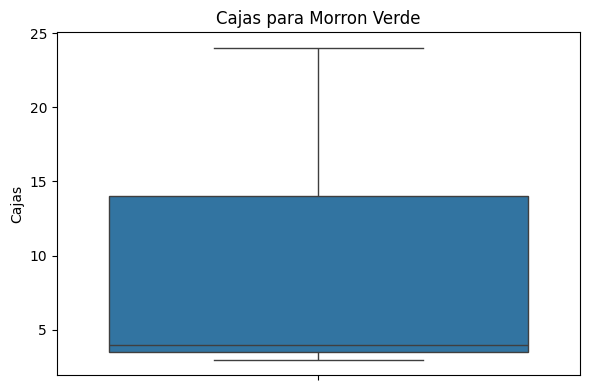

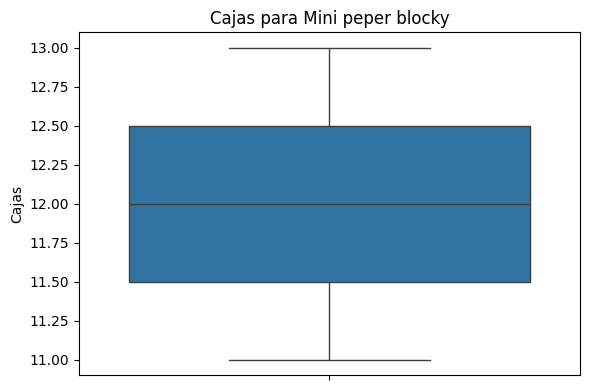

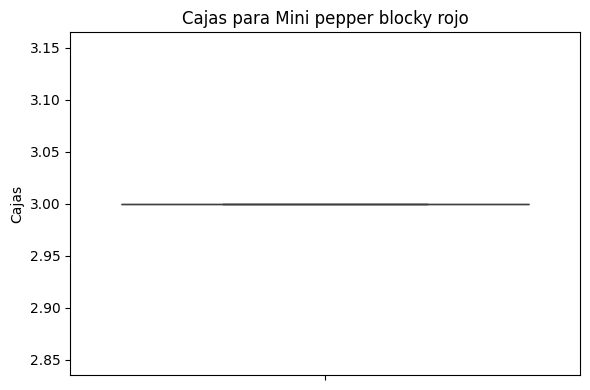

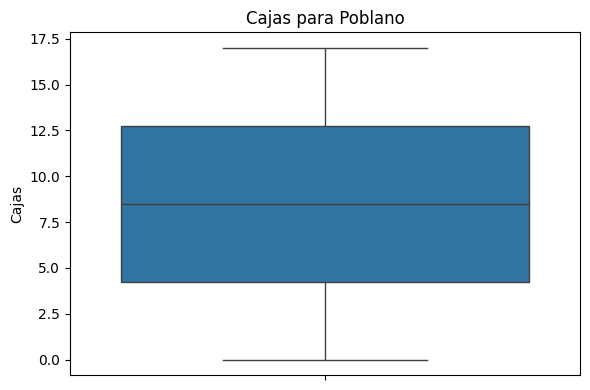

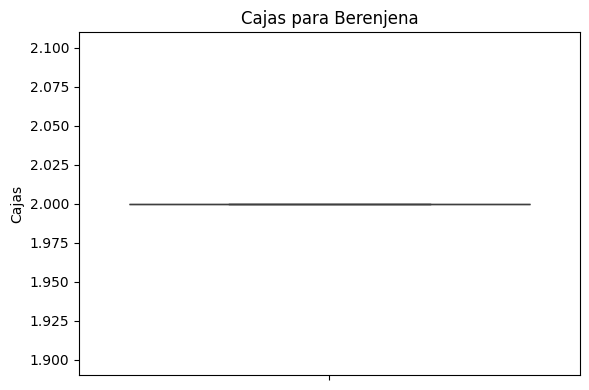

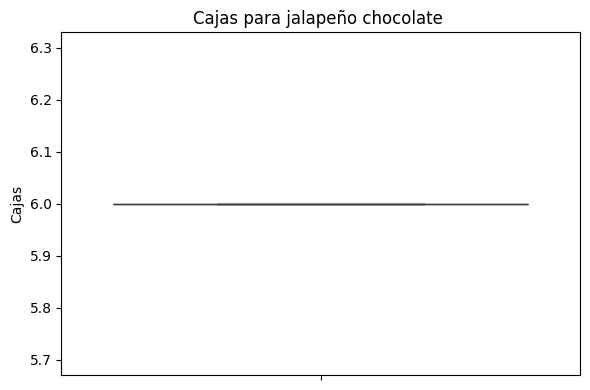

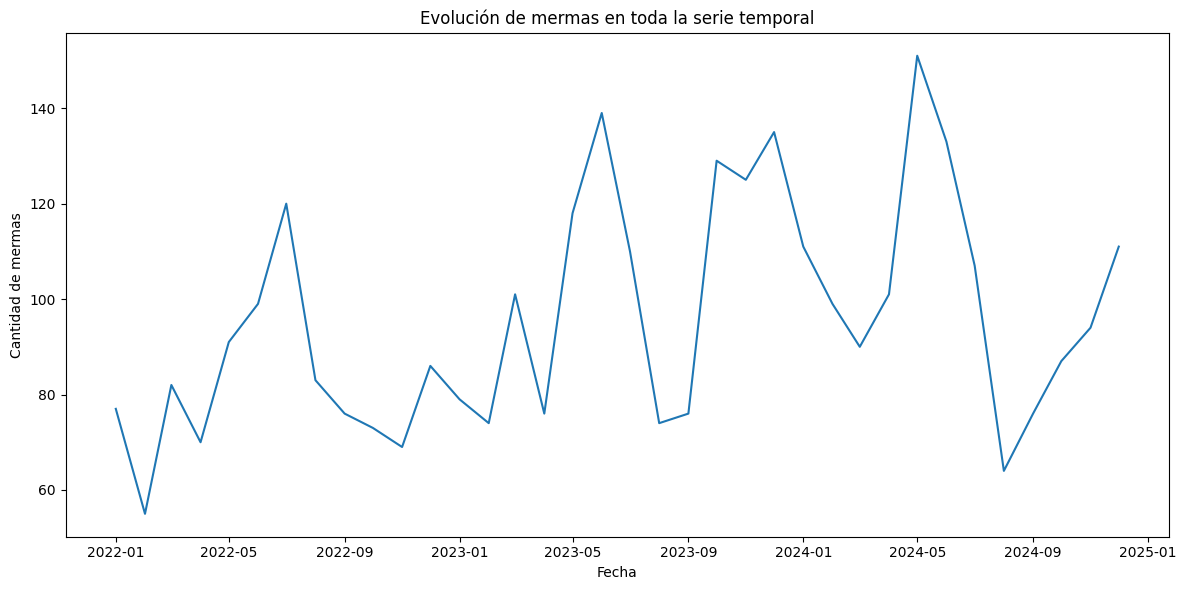

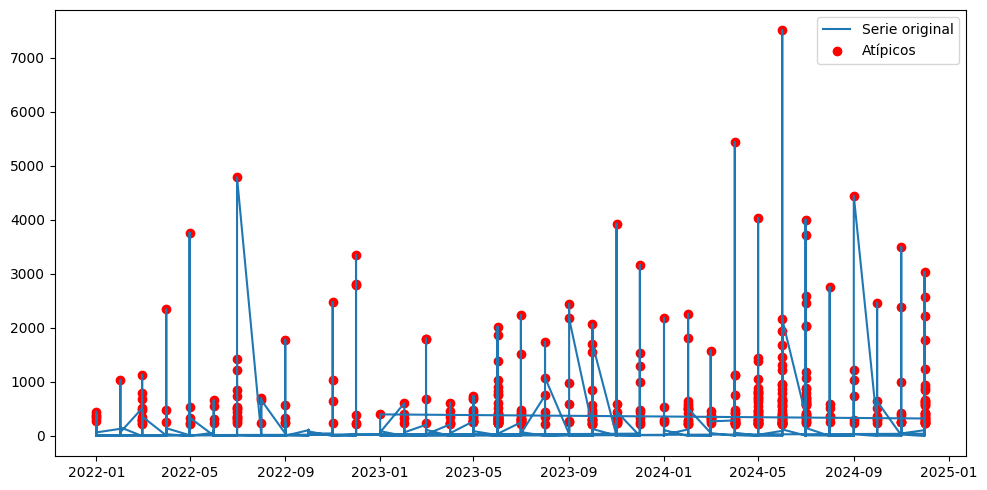

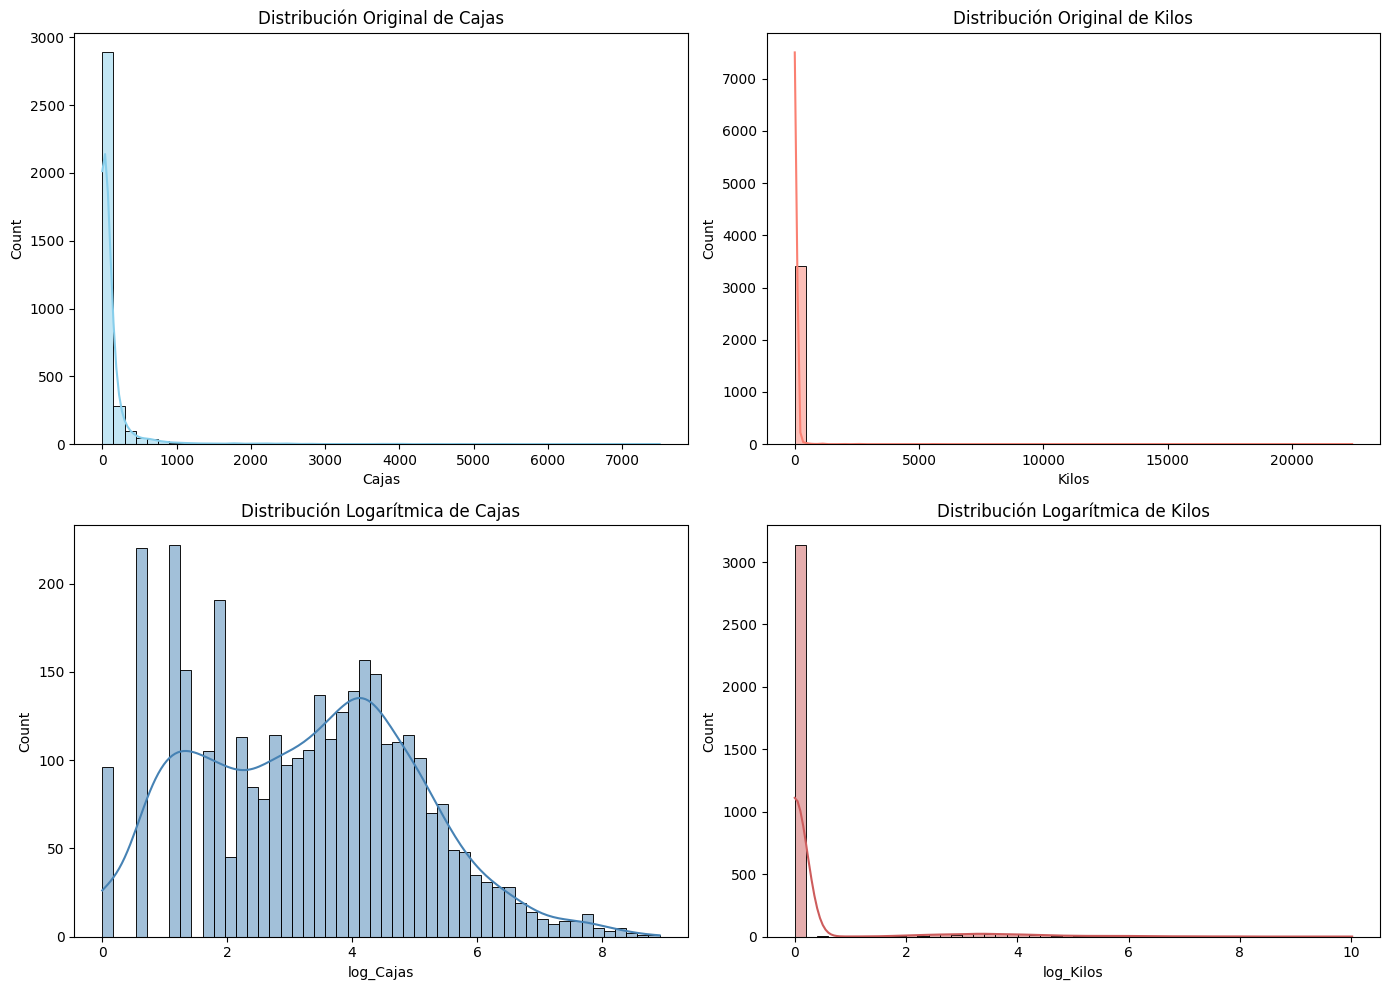

<ipython-input-59-b31110b48a2d>:164: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mermas_por_fecha = df.groupby(['Year', 'Month']).size().reset_index(name='Total_Mermas')


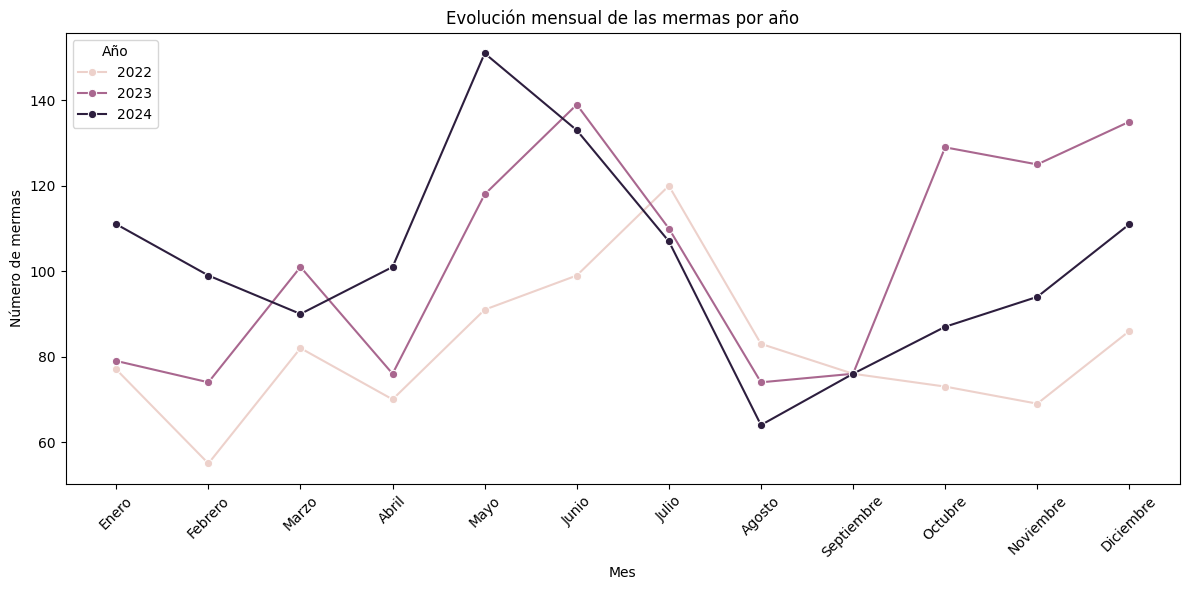

Matriz de correlación:
                   Year     Cajas     Kilos  Importe_Venta  log_Cajas  \
Year           1.000000  0.093275  0.015314            NaN   0.146355   
Cajas          0.093275  1.000000  0.048632            NaN   0.549400   
Kilos          0.015314  0.048632  1.000000            NaN   0.031833   
Importe_Venta       NaN       NaN       NaN            NaN        NaN   
log_Cajas      0.146355  0.549400  0.031833            NaN   1.000000   
log_Kilos      0.002432 -0.077010  0.308478            NaN  -0.300404   
Month_Num     -0.038818  0.043637 -0.011420            NaN   0.059995   

               log_Kilos  Month_Num  
Year            0.002432  -0.038818  
Cajas          -0.077010   0.043637  
Kilos           0.308478  -0.011420  
Importe_Venta        NaN        NaN  
log_Cajas      -0.300404   0.059995  
log_Kilos       1.000000   0.009132  
Month_Num       0.009132   1.000000  


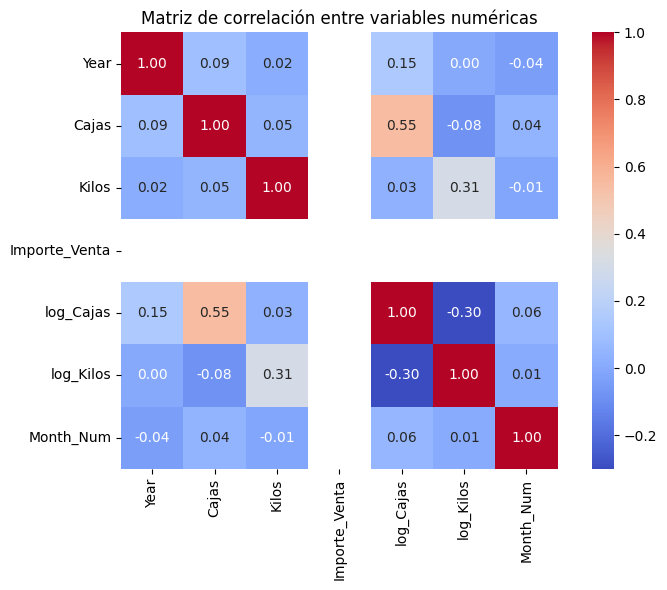

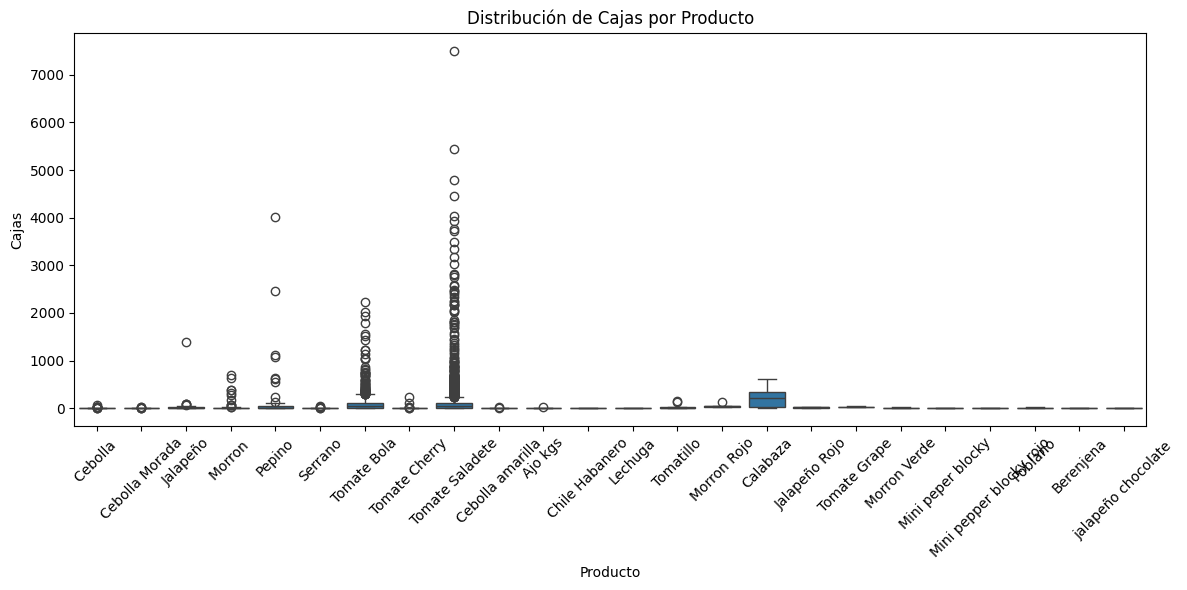

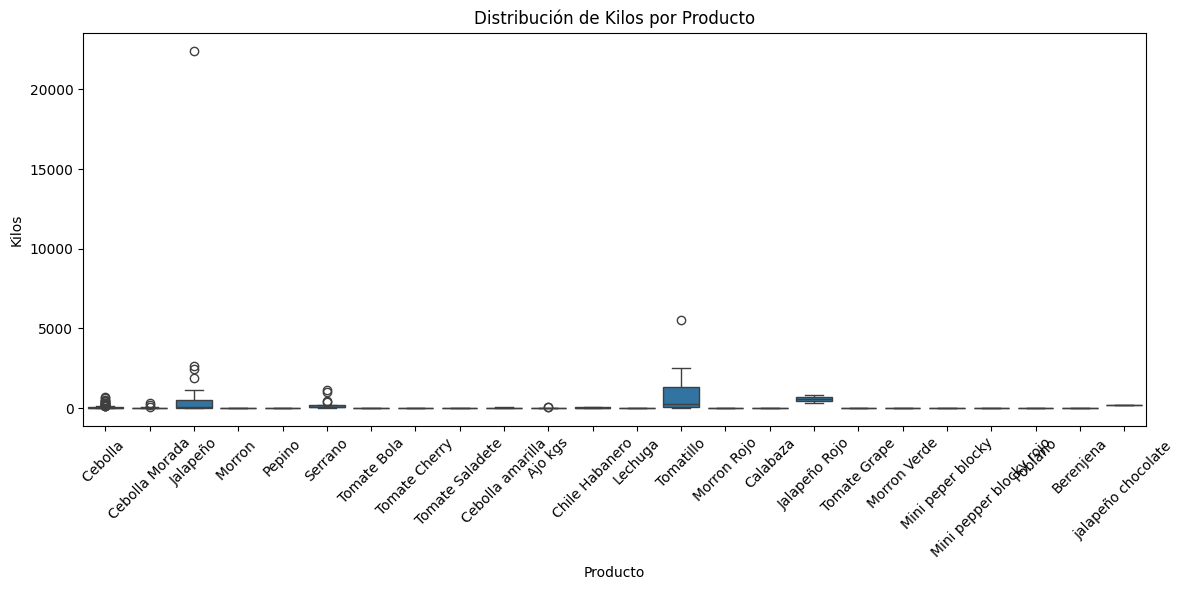

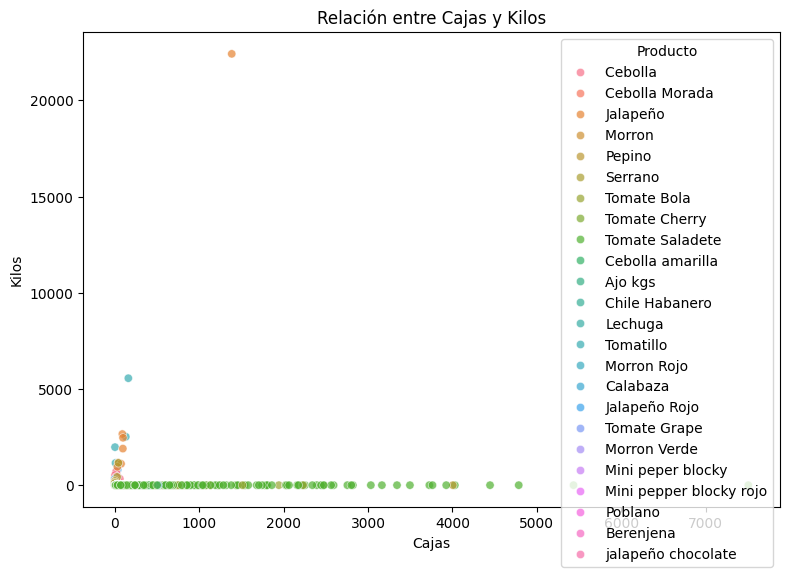

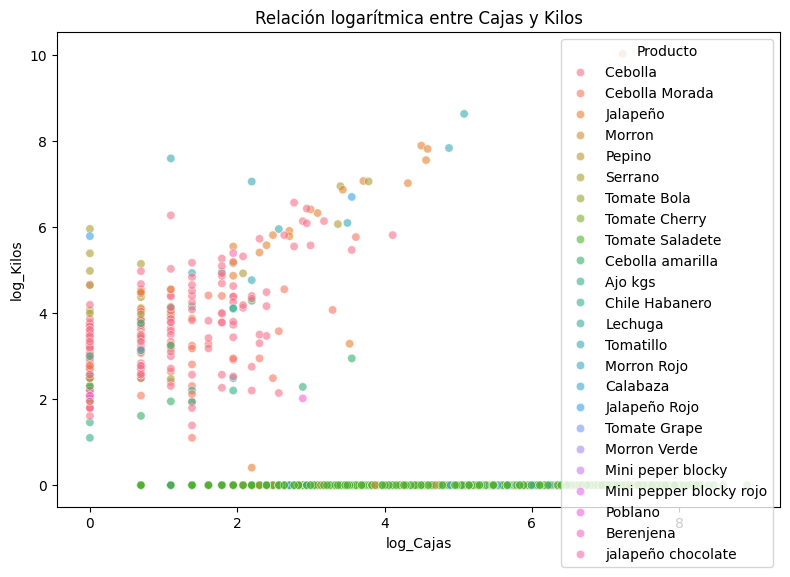

In [ ]:
# Cargar datasets de bodega e isla
df_bod = pd.read_csv("/content/merma_bod_combinado_2022-2024.csv")
df_isla = pd.read_csv("/content/merma_isla_combinado_2022-2024.csv")

# Añadir columna de origen para trazabilidad
df_bod['Origen'] = 'Bodega'
df_isla['Origen'] = 'Isla'

# Unificar ambos datasets
df = pd.concat([df_bod, df_isla], ignore_index=True)

# Estadísticas descriptiva
display(df.describe())
display(df.describe(include='object'))

# Porcentaje de valores faltantes
missing_percent = df.isnull().mean() * 100
display(missing_percent.sort_values(ascending=False))

# Eliminar columnas con más del 30% de NaN
threshold = 30
cols_to_drop = missing_percent[missing_percent > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

# Análisis de valores faltantes
missing_percent = df.isnull().mean() * 100
display(missing_percent.sort_values(ascending=False))

# Eliminar columnas con más del 30% de NaN
cols_to_drop = missing_percent[missing_percent > 30].index
df.drop(columns=cols_to_drop, inplace=True)

# Imputar el resto con 0
df.fillna(0, inplace=True)

# Visualización de cardinalidad de variables categóricas
cat_vars = df.select_dtypes(include='object').columns
for col in cat_vars:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Cardinalidad de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualización de distribuciones
df['log_Cajas'] = np.log1p(df['Cajas'])
df['log_Kilos'] = np.log1p(df['Kilos'])

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['Cajas'], bins=50, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución Original de Cajas')

sns.histplot(df['Kilos'], bins=50, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribución Original de Kilos')

sns.histplot(df['log_Cajas'], bins=50, kde=True, ax=axes[1, 0], color='steelblue')
axes[1, 0].set_title('Distribución Logarítmica de Cajas')

sns.histplot(df['log_Kilos'], bins=50, kde=True, ax=axes[1, 1], color='indianred')
axes[1, 1].set_title('Distribución Logarítmica de Kilos')

plt.tight_layout()
plt.show()

# Boxplots sin outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Producto', y='Cajas', showfliers=False)
plt.xticks(rotation=45)
plt.title("Distribución de Cajas por Producto (sin outliers)")
plt.tight_layout()
plt.show()

# Boxplot por subgráficos
productos = df['Producto'].unique()
for producto in productos:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[df['Producto'] == producto], y='Cajas')
    plt.title(f'Cajas para {producto}')
    plt.tight_layout()
    plt.show()

# Cajas vs Kilos no se recomienda si hay muchos faltantes en Kilos
# Entonces se omite como variable objetivo

meses = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4,
    'mayo': 5, 'junio': 6, 'julio': 7, 'agosto': 8,
    'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

df['Month'] = df['Month'].astype(str).str.strip().str.lower()
df['Month_Num'] = df['Month'].map(meses)
df['Fecha'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month_Num'].astype('Int64').astype(str) + '-01', errors='coerce')

# Serie temporal combinada de mermas
df['Fecha'] = pd.to_datetime(df['Fecha'])
df_grouped = df.groupby('Fecha').size().reset_index(name='Total_Mermas')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Fecha', y='Total_Mermas')
plt.title('Evolución de mermas en toda la serie temporal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de mermas')
plt.tight_layout()
plt.show()

# Detección y visualización de valores atípicos
Q1 = df['Cajas'].quantile(0.25)
Q3 = df['Cajas'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
df['atipico'] = (df['Cajas'] < lim_inf) | (df['Cajas'] > lim_sup)

plt.figure(figsize=(10, 5))
plt.plot(df['Fecha'], df['Cajas'], label="Serie original")
plt.scatter(df['Fecha'][df['atipico']], df['Cajas'][df['atipico']], color="red", label="Atípicos")
plt.legend()
plt.tight_layout()
plt.show()

df['Cajas'] = df['Cajas'].fillna(0)
df['Kilos'] = df['Kilos'].fillna(0)

df['log_Cajas'] = np.log1p(df['Cajas'])
df['log_Kilos'] = np.log1p(df['Kilos'])

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribución original
sns.histplot(df['Cajas'], bins=50, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución Original de Cajas')

sns.histplot(df['Kilos'], bins=50, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribución Original de Kilos')

# Distribución transformada (log)
sns.histplot(df['log_Cajas'], bins=50, kde=True, ax=axes[1, 0], color='steelblue')
axes[1, 0].set_title('Distribución Logarítmica de Cajas')

sns.histplot(df['log_Kilos'], bins=50, kde=True, ax=axes[1, 1], color='indianred')
axes[1, 1].set_title('Distribución Logarítmica de Kilos')

plt.tight_layout()
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Si tienes la columna "Month" como texto, necesitas convertirla a un número para ordenarlo cronológicamente:
df['Month'] = df['Month'].astype(str).str.strip().str.capitalize()

meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                   'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df['Month'] = pd.Categorical(df['Month'], categories=meses_ordenados, ordered=True)

# Agrupar datos por año y mes
mermas_por_fecha = df.groupby(['Year', 'Month']).size().reset_index(name='Total_Mermas')

# Visualización
plt.figure(figsize=(12, 6))
sns.lineplot(data=mermas_por_fecha, x='Month', y='Total_Mermas', hue='Year', marker='o')
plt.title('Evolución mensual de las mermas por año')
plt.xlabel('Mes')
plt.ylabel('Número de mermas')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
df_numericas = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_corr = df_numericas.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(matriz_corr)

# Visualización con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

#Analisis Bi variado

# Análisis bivariado: Producto vs Cajas (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Producto', y='Cajas')
plt.xticks(rotation=45)
plt.title("Distribución de Cajas por Producto")
plt.tight_layout()
plt.show()

# Producto vs Kilos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Producto', y='Kilos')
plt.xticks(rotation=45)
plt.title("Distribución de Kilos por Producto")
plt.tight_layout()
plt.show()

# Análisis bivariado: Cajas vs Kilos (scatterplot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Cajas', y='Kilos', hue='Producto', alpha=0.7)
plt.title("Relación entre Cajas y Kilos")
plt.tight_layout()
plt.show()

# Análisis con variable transformada (logarítmica)
import numpy as np
df['log_Cajas'] = np.log1p(df['Cajas'])
df['log_Kilos'] = np.log1p(df['Kilos'])

# log_Cajas vs log_Kilos
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='log_Cajas', y='log_Kilos', hue='Producto', alpha=0.6)
plt.title("Relación logarítmica entre Cajas y Kilos")
plt.tight_layout()
plt.show()

,Year,Cajas,Kilos,Importe_Venta,log_Cajas,log_Kilos,Month_Num,Fecha
count,3441.000000,3441.000000,3441.000000,3441.0,3441.000000,3441.000000,3441.000000,3441
mean,2023.070619,120.402209,19.816434,0.0,3.282551,0.333134,6.619297,2023-07-16 03:24:38.291194368
min,2022.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2022-01-01 00:00:00
25%,2022.000000,5.000000,0.000000,0.0,1.791759,0.000000,4.000000,2022-11-01 00:00:00
50%,2023.000000,28.000000,0.000000,0.0,3.367296,0.000000,6.000000,2023-08-01 00:00:00
75%,2024.000000,90.000000,0.000000,0.0,4.510860,0.000000,10.000000,2024-04-01 00:00:00
max,2024.000000,7505.000000,22418.000000,0.0,8.923458,10.017664,12.000000,2024-12-01 00:00:00
std,0.797496,369.362782,407.874704,0.0,1.748325,1.150635,3.403883,NaN


,Source,Producto,Etiqueta,Tamaño,Origen
count,3441,3441,3441,3441,3441
unique,2,24,266,53,2
top,bod,Tomate Saladete,GENERICA,LG,Bodega
freq,2916,2124,430,529,2916


,0
Year,0.0
Month,0.0
Source,0.0
Producto,0.0
Etiqueta,0.0
Tamaño,0.0
Cajas,0.0
Kilos,0.0
Importe_Venta,0.0
Origen,0.0


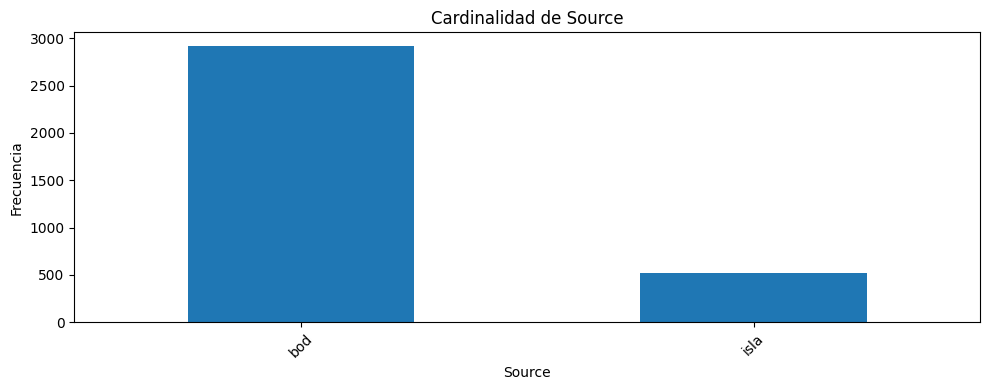

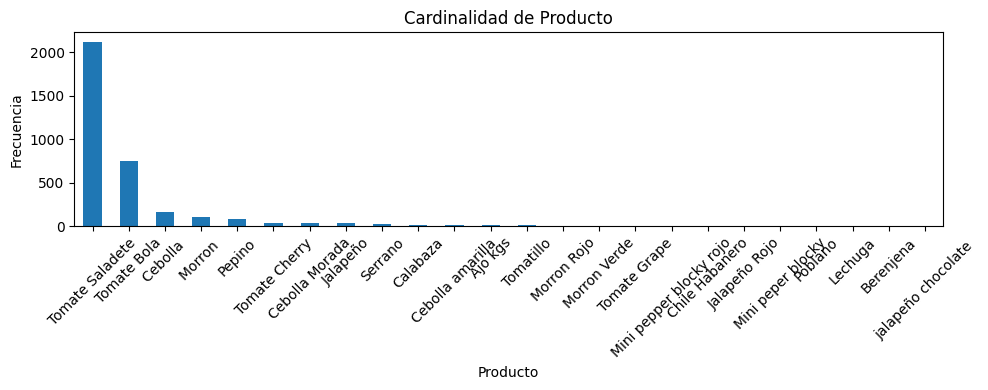

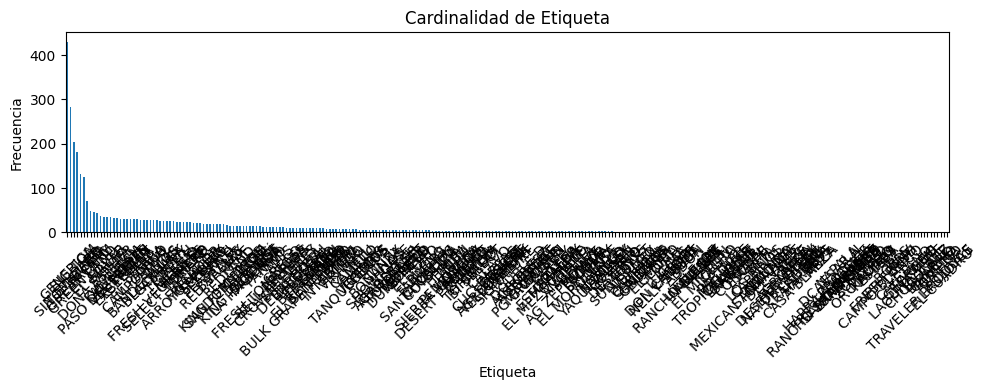

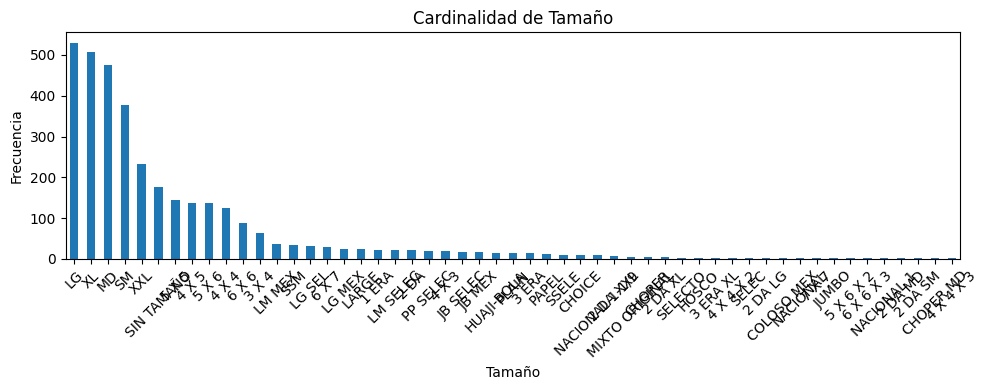

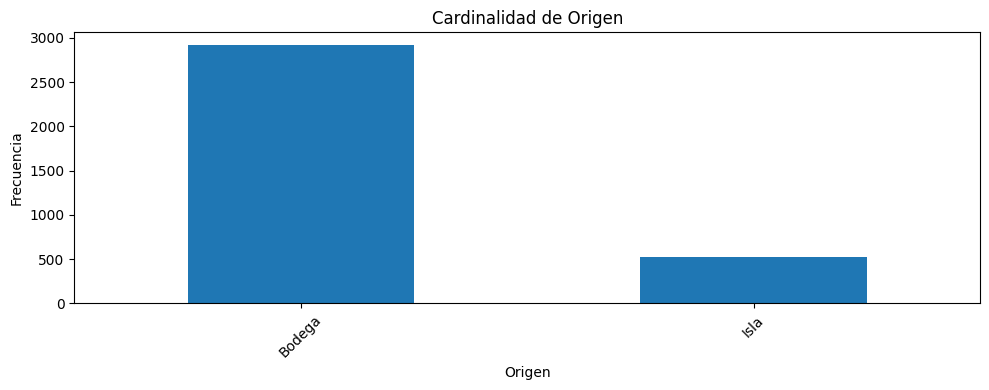

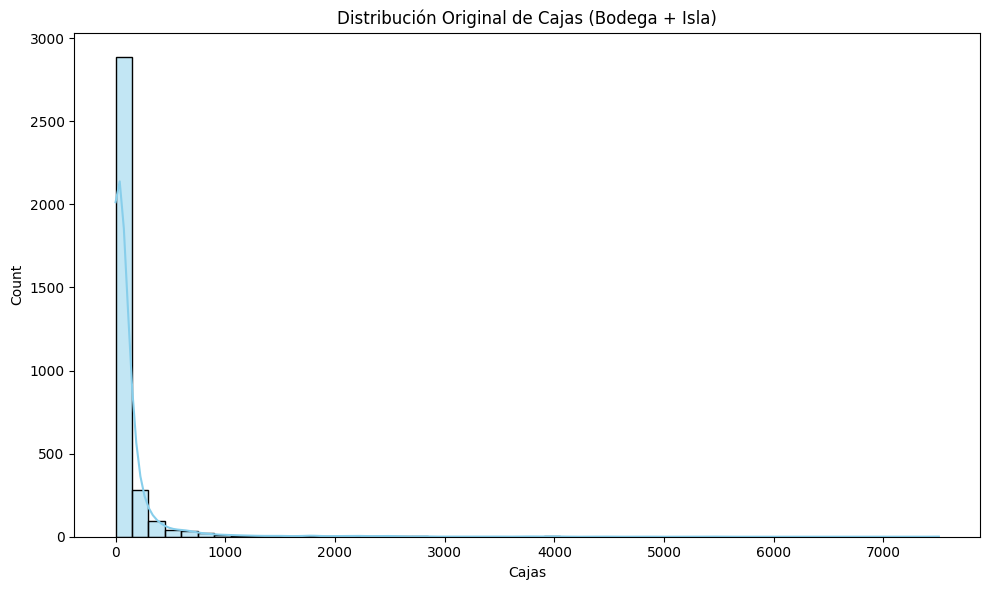

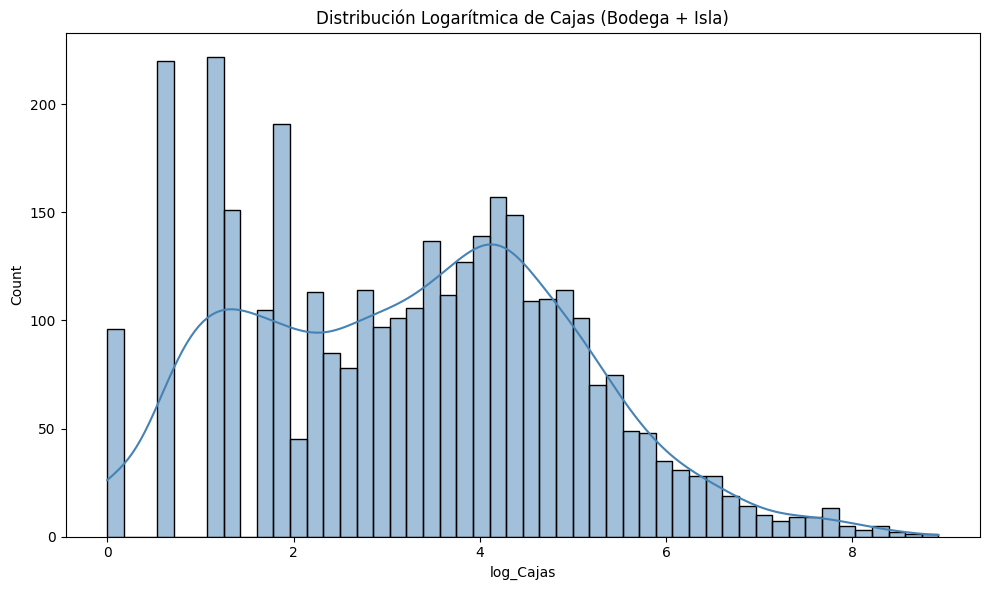

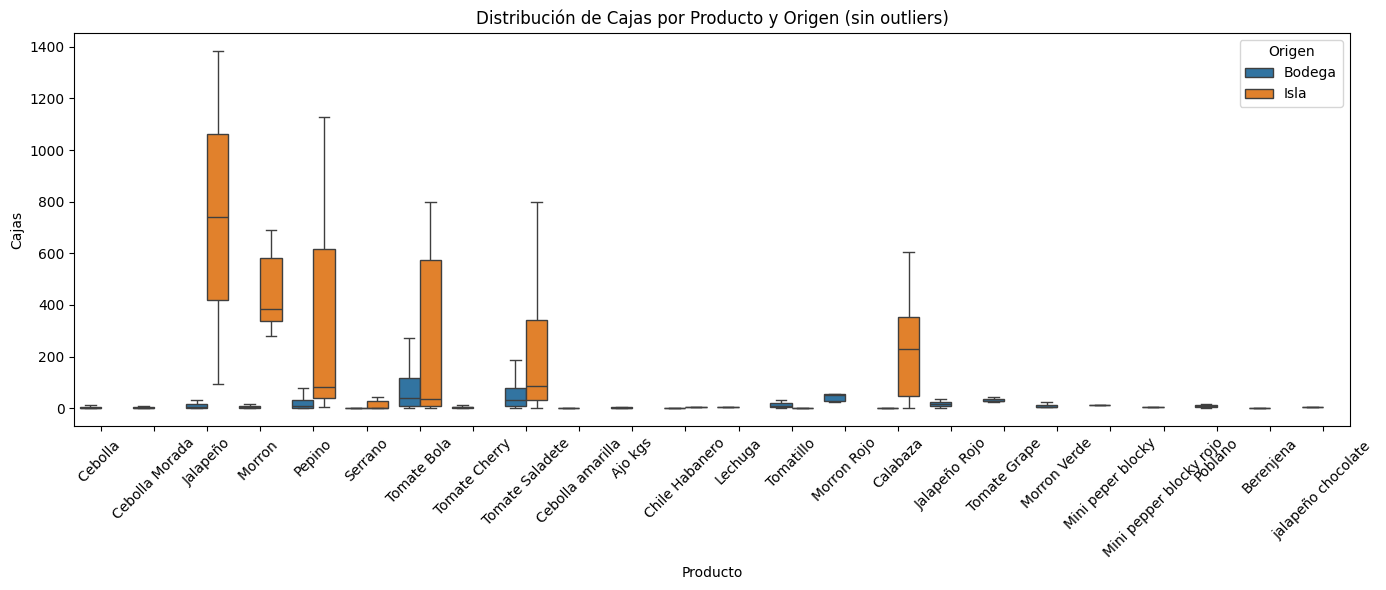

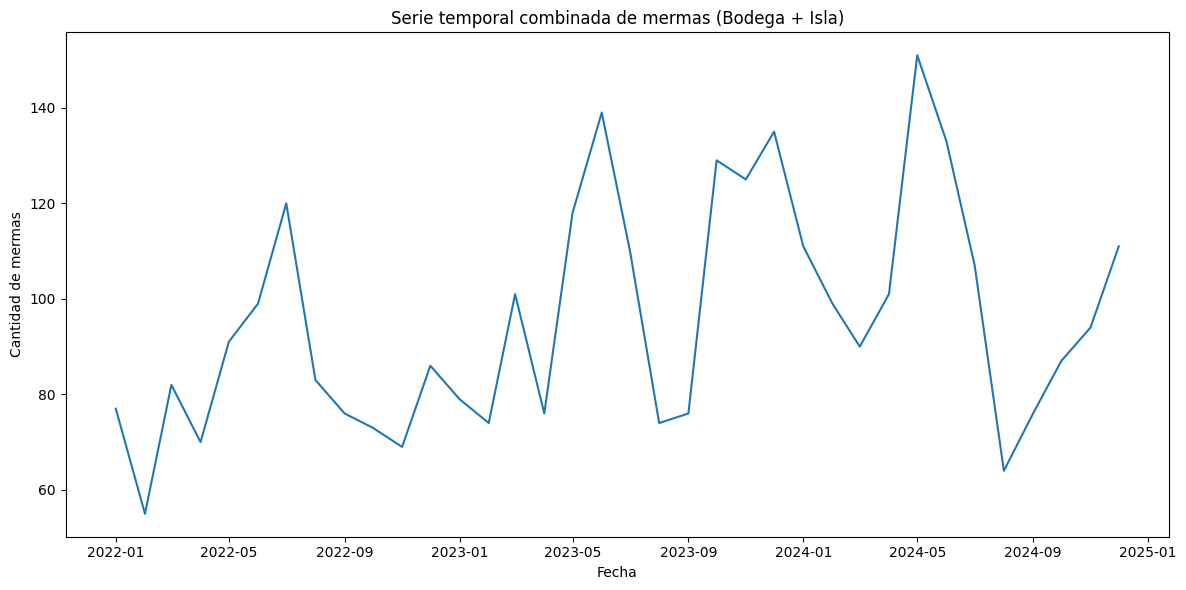

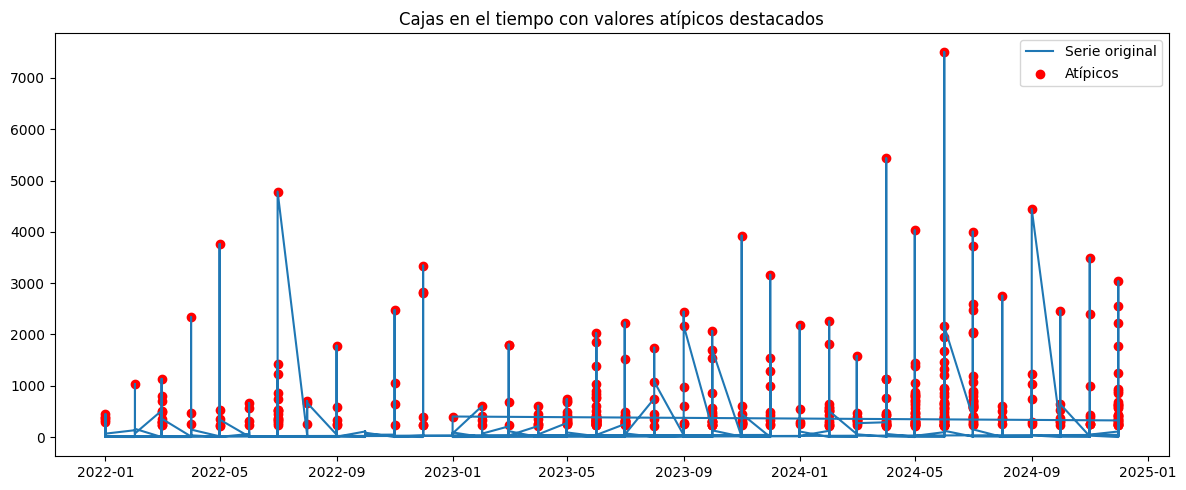


### Resumen del Análisis

- Total de registros combinados: **3441**
- Valores atípicos detectados en 'Cajas': **378** (**10.99%** del total)
- Variables eliminadas por superar 30% de valores nulos: ['Color']
- Variables categóricas con más de 10 categorías: ['Month', 'Producto', 'Etiqueta', 'Tamaño']


In [ ]:
# -------------------------------
# ANÁLISIS EXPLORATORIO CONJUNTO
# -------------------------------

# Separar estadísticas descriptivas para numéricas y categóricas
display(df.describe())  # estadísticas numéricas
display(df.describe(include='object'))  # estadísticas categóricas

# Calcular % de valores faltantes
missing_percent = df.isnull().mean() * 100
display(missing_percent.sort_values(ascending=False))

# Eliminar columnas con >30% de NaN
cols_to_drop = missing_percent[missing_percent > 30].index
df.drop(columns=cols_to_drop, inplace=True)

# Imputar solo en columnas numéricas
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(0)

# -------------------------------
# Análisis de cardinalidad de variables categóricas
# -------------------------------
cat_vars = df.select_dtypes(include='object').columns
for col in cat_vars:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Cardinalidad de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# -------------------------------
# Visualización de distribución de cajas
# -------------------------------
df['log_Cajas'] = np.log1p(df['Cajas'])

plt.figure(figsize=(10, 6))
sns.histplot(df['Cajas'], bins=50, kde=True, color='skyblue')
plt.title('Distribución Original de Cajas (Bodega + Isla)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['log_Cajas'], bins=50, kde=True, color='steelblue')
plt.title('Distribución Logarítmica de Cajas (Bodega + Isla)')
plt.tight_layout()
plt.show()

# -------------------------------
# Boxplot sin atípicos por producto y por origen
# -------------------------------
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Producto', y='Cajas', hue='Origen', showfliers=False)
plt.title('Distribución de Cajas por Producto y Origen (sin outliers)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# Serie temporal conjunta
# -------------------------------
# Construcción robusta de la columna 'Fecha'
# -------------------------------

# Diccionario de mapeo para nombres de meses en español a número
meses = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4,
    'mayo': 5, 'junio': 6, 'julio': 7, 'agosto': 8,
    'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Asegurarse de que la columna 'Month' esté en minúsculas y sin espacios
df['Month'] = df['Month'].astype(str).str.strip().str.lower()

# Mapear a número de mes
df['Month_Num'] = df['Month'].map(meses)

# Verificar si hubo meses que no se pudieron mapear
if df['Month_Num'].isna().sum() > 0:
    print("Advertencia: Algunos valores de 'Month' no se pudieron convertir a número.")

# Crear columna 'Fecha' con año y mes (día fijo = 1)
df['Fecha'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month_Num'].astype('Int64').astype(str) + '-01', errors='coerce')

# Verificar si alguna fecha no se creó correctamente
if df['Fecha'].isna().sum() > 0:
    print("Advertencia: Algunas fechas no se construyeron correctamente.")

df['Fecha'] = pd.to_datetime(df['Fecha'])
df_grouped = df.groupby('Fecha').size().reset_index(name='Total_Mermas')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Fecha', y='Total_Mermas')
plt.title('Serie temporal combinada de mermas (Bodega + Isla)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de mermas')
plt.tight_layout()
plt.show()

# -------------------------------
# Detección y visualización de valores atípicos en Cajas
# -------------------------------
Q1 = df['Cajas'].quantile(0.25)
Q3 = df['Cajas'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
df['atipico'] = (df['Cajas'] < lim_inf) | (df['Cajas'] > lim_sup)

plt.figure(figsize=(12, 5))
plt.plot(df['Fecha'], df['Cajas'], label="Serie original")
plt.scatter(df['Fecha'][df['atipico']], df['Cajas'][df['atipico']], color="red", label="Atípicos")
plt.title("Cajas en el tiempo con valores atípicos destacados")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Sugerencia: suavizar valores atípicos con la mediana mensual
# -------------------------------
# Sustituir valores atípicos por la mediana del mismo mes (opcional, solo si afecta análisis futuro)
df['Mes'] = df['Fecha'].dt.month
for mes in df['Mes'].unique():
    mediana_mes = df.loc[(df['Mes'] == mes) & (~df['atipico']), 'Cajas'].median()
    df.loc[(df['Mes'] == mes) & (df['atipico']), 'Cajas'] = mediana_mes

    # CONCLUSIONES AUTOMÁTICAS DEL ANÁLISIS
# -------------------------------

from IPython.display import Markdown

# Cantidad total de registros
total_registros = len(df)

# Porcentaje de registros con valores atípicos
total_atipicos = df['atipico'].sum()
porcentaje_atipicos = 100 * total_atipicos / total_registros

# Variables numéricas con más valores faltantes (antes del llenado)
missing_before = pd.concat([df_bod, df_isla], ignore_index=True)
missing_percent = missing_before.isnull().mean() * 100
missing_mas_30 = missing_percent[missing_percent > 30].index.tolist()

# Variables categóricas con alta cardinalidad
cat_vars = df.select_dtypes(include='object').columns
cardinalidad = {col: df[col].nunique() for col in cat_vars}
card_mas_10 = [k for k, v in cardinalidad.items() if v > 10]

# Mostrar resumen
display(Markdown(f"""
### Resumen del Análisis

- Total de registros combinados: **{total_registros}**
- Valores atípicos detectados en 'Cajas': **{total_atipicos}** (**{porcentaje_atipicos:.2f}%** del total)
- Variables eliminadas por superar 30% de valores nulos: {missing_mas_30 if missing_mas_30 else "Ninguna"}
- Variables categóricas con más de 10 categorías: {card_mas_10 if card_mas_10 else "Ninguna"}
"""))


In [ ]:
# -------------------------------
# TRANSFORMACION
# -------------------------------

# -------------------------------
# Codificación One-Hot de variables categóricas
# -------------------------------
# Seleccionar variable
cat_column = 'Producto'

# Aplicar codificación one-hot (versión simplificada para df)
df_encoded = pd.get_dummies(df, columns=[cat_column], prefix=cat_column)

# Mostrar columnas resultantes
print(f"Columnas después de one-hot encoding de '{cat_column}':")
print([col for col in df_encoded.columns if cat_column in col])

# -------------------------------
# Escalamiento Min-Max de variable numérica
# -------------------------------
scaler = MinMaxScaler()
df_encoded['Cajas_minmax'] = scaler.fit_transform(df_encoded[['Cajas']])

print("\nEscalado Min-Max en 'Cajas':")
print(df_encoded[['Cajas', 'Cajas_minmax']].head())

# -------------------------------
# Transformación logarítmica
# -------------------------------
df_encoded['Cajas_log'] = np.log1p(df_encoded['Cajas'])

print("\nTransformación logarítmica en 'Cajas':")
print(df_encoded[['Cajas', 'Cajas_log']].head())


Columnas después de one-hot encoding de 'Producto':
['Producto_Ajo kgs', 'Producto_Berenjena', 'Producto_Calabaza', 'Producto_Cebolla ', 'Producto_Cebolla Morada', 'Producto_Cebolla amarilla', 'Producto_Chile Habanero', 'Producto_Jalapeño', 'Producto_Jalapeño Rojo', 'Producto_Lechuga', 'Producto_Mini peper blocky', 'Producto_Mini pepper blocky rojo', 'Producto_Morron ', 'Producto_Morron Rojo', 'Producto_Morron Verde', 'Producto_Pepino', 'Producto_Poblano', 'Producto_Serrano', 'Producto_Tomate Bola', 'Producto_Tomate Cherry', 'Producto_Tomate Grape', 'Producto_Tomate Saladete', 'Producto_Tomatillo', 'Producto_jalapeño chocolate ']

Escalado Min-Max en 'Cajas':
   Cajas  Cajas_minmax
0      5      0.023041
1      8      0.036866
2      0      0.000000
3      2      0.009217
4      0      0.000000

Transformación logarítmica en 'Cajas':
   Cajas  Cajas_log
0      5   1.791759
1      8   2.197225
2      0   0.000000
3      2   1.098612
4      0   0.000000


In [ ]:

# -------------------------------
# SELECCIÓN Y REDUCCIÓN DE CARACTERÍSTICAS CON PCA
# -------------------------------
# Seleccionar columnas numéricas para reducción
cols_to_exclude = ['Year', 'Month_Num', 'Mes']
num_cols = df_encoded.select_dtypes(include=['float64', 'int64']).drop(columns=['Year', 'Month_Num', 'Mes'], errors='ignore').columns



# Estandarizar las variables antes de PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded[num_cols])

# Aplicar PCA para reducir dimensiones
pca = PCA(n_components=2)  # mantener solo 2 componentes principales para ilustración
X_pca = pca.fit_transform(X_scaled)

# Mostrar varianza explicada por componente
print("Varianza explicada por componente:")
print(pca.explained_variance_ratio_)

# Crear un nuevo DataFrame con los componentes
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print("\nPrimeras filas de los componentes principales:")
print(df_pca.head())

Varianza explicada por componente:
[0.57445003 0.21177704]

Primeras filas de los componentes principales:
        PC1       PC2
0 -2.165414  1.904006
1 -1.921422  2.211050
2 -3.012372  0.525093
3 -2.491374  1.260184
4 -3.218543  1.227524


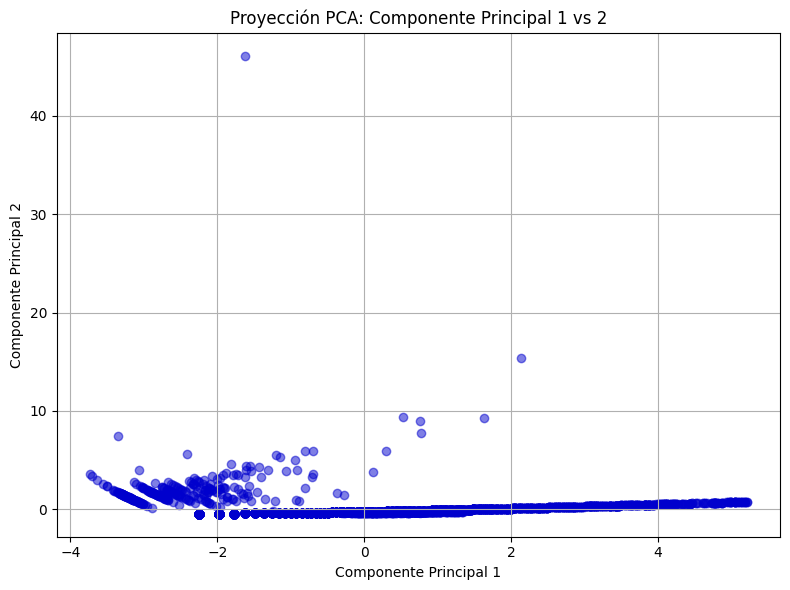

In [ ]:

# -------------------------------
# VISUALIZACIÓN DE LOS COMPONENTES PRINCIPALES (PCA)
# -------------------------------

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5, c='mediumblue')
plt.title("Proyección PCA: Componente Principal 1 vs 2")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()


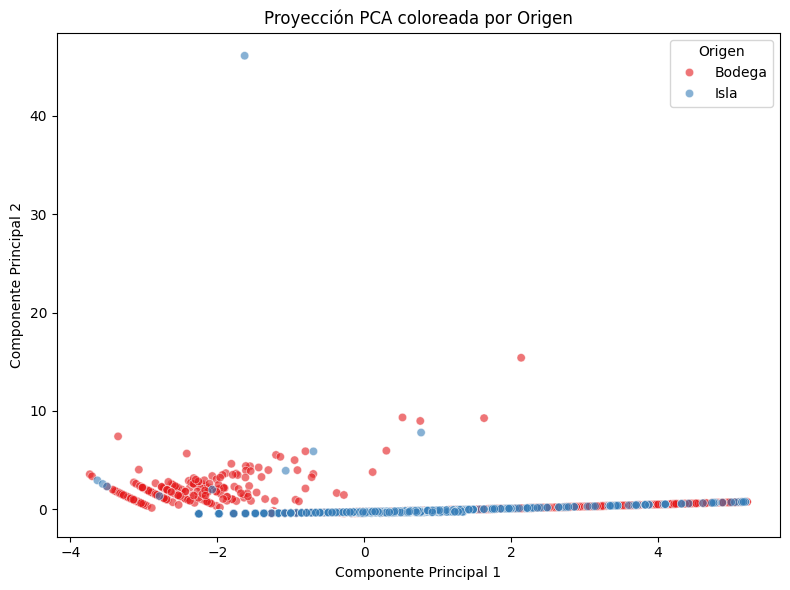

In [ ]:
# -------------------------------
# PCA CON COLORES POR CATEGORÍA (Origen)
# -------------------------------

# Añadir la categoría 'Origen' al DataFrame de PCA para visualización
df_pca['Origen'] = df['Origen'].values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Origen', palette='Set1', alpha=0.6)
plt.title("Proyección PCA coloreada por Origen")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Origen')
plt.tight_layout()
plt.show()


In [ ]:
#-------------------------------
# FUNDAMENTACIÓN DE MÉTODOS EJECUTADOS EN LA PREPARACIÓN DE DATOS
# -------------------------------

display(Markdown("""
### Justificación de los métodos ejecutados

Durante la fase de preparación de los datos, se aplicaron diversas transformaciones y técnicas con base en principios de calidad, interpretabilidad y eficiencia para el aprendizaje automático. A continuación, se justifica cada una:

#### 1. **Codificación One-Hot**
- Se utilizó `One-Hot Encoding` sobre la variable `Producto` debido a que es una variable categórica sin orden inherente.
- Esta técnica evita introducir relaciones artificiales de jerarquía entre categorías.
- Permite que modelos basados en distancia o pesos (como regresiones o árboles) interpreten correctamente las variables.

#### 2. **Escalamiento Min-Max**
- Se aplicó `MinMaxScaler` a la variable `Cajas` para normalizar sus valores entre 0 y 1.
- Este método es útil cuando se requiere preservar la forma de la distribución y es compatible con algoritmos sensibles a la escala como k-NN o SVM.

#### 3. **Transformación Logarítmica**
- Se utilizó `log1p()` sobre `Cajas` para reducir la asimetría positiva (distribución sesgada a la derecha).
- Esta transformación mejora la normalidad de la variable, lo que puede beneficiar modelos lineales o redes neuronales.

#### 4. **Reducción de dimensionalidad con PCA**
- Se aplicó `PCA` para ilustrar cómo reducir las dimensiones numéricas del dataset.
- Esto facilita la visualización y permite identificar patrones o clústeres latentes.
- También ayuda a eliminar colinealidad y reducir el sobreajuste en modelos complejos.

> Todas estas técnicas fueron elegidas por su aplicabilidad a los datos disponibles, su robustez y su utilidad práctica para etapas posteriores del modelado.
"""))


### Justificación de los métodos ejecutados

Durante la fase de preparación de los datos, se aplicaron diversas transformaciones y técnicas con base en principios de calidad, interpretabilidad y eficiencia para el aprendizaje automático. A continuación, se justifica cada una:

#### 1. **Codificación One-Hot**
- Se utilizó `One-Hot Encoding` sobre la variable `Producto` debido a que es una variable categórica sin orden inherente.
- Esta técnica evita introducir relaciones artificiales de jerarquía entre categorías.
- Permite que modelos basados en distancia o pesos (como regresiones o árboles) interpreten correctamente las variables.

#### 2. **Escalamiento Min-Max**
- Se aplicó `MinMaxScaler` a la variable `Cajas` para normalizar sus valores entre 0 y 1.
- Este método es útil cuando se requiere preservar la forma de la distribución y es compatible con algoritmos sensibles a la escala como k-NN o SVM.

#### 3. **Transformación Logarítmica**
- Se utilizó `log1p()` sobre `Cajas` para reducir la asimetría positiva (distribución sesgada a la derecha).
- Esta transformación mejora la normalidad de la variable, lo que puede beneficiar modelos lineales o redes neuronales.

#### 4. **Reducción de dimensionalidad con PCA**
- Se aplicó `PCA` para ilustrar cómo reducir las dimensiones numéricas del dataset.
- Esto facilita la visualización y permite identificar patrones o clústeres latentes.
- También ayuda a eliminar colinealidad y reducir el sobreajuste en modelos complejos.

> Todas estas técnicas fueron elegidas por su aplicabilidad a los datos disponibles, su robustez y su utilidad práctica para etapas posteriores del modelado.


In [ ]:
# -------------------------------
# CONCLUSIONES DE LA FASE "PREPARACIÓN DE LOS DATOS" (CRISP-ML)
# -------------------------------

display(Markdown("""
### Conclusiones de la fase de Preparación de los Datos (CRISP-ML)

La fase de **preparación de los datos** del ciclo de vida CRISP-ML ha sido completada siguiendo criterios de calidad, eficiencia y trazabilidad. A continuación, se resumen los principales logros y decisiones justificadas:

- Se realizó una limpieza estructurada de los datos crudos, eliminando variables con más del 30% de valores faltantes.
- Los valores faltantes restantes fueron imputados con ceros, tras análisis del impacto porcentual variable por variable.
- Se generaron nuevas variables útiles, como la columna `Fecha` a partir de `Year` y `Month`, para facilitar el análisis temporal.
- Se detectaron y trataron valores atípicos mediante el método IQR (cuartiles), con visualización clara en la dimensión temporal.
- Se aplicaron transformaciones clave:
  - **Codificación one-hot** para variables categóricas nominales (e.g., `Producto`)
  - **Escalamiento min–max** para normalizar variables numéricas
  - **Transformación logarítmica** para reducir sesgos de distribución
- Se aplicó reducción de dimensionalidad con **PCA** para facilitar visualización y posibles mejoras de rendimiento en modelado.

Estas acciones permiten establecer un conjunto de datos más limpio, confiable y útil para las siguientes fases: modelado, evaluación y despliegue.

> La trazabilidad de cada transformación y decisión se encuentra documentada en esta libreta para garantizar la reproducibilidad y facilitar el mantenimiento del pipeline de ciencia de datos.
"""))


### Conclusiones de la fase de Preparación de los Datos (CRISP-ML)

La fase de **preparación de los datos** del ciclo de vida CRISP-ML ha sido completada siguiendo criterios de calidad, eficiencia y trazabilidad. A continuación, se resumen los principales logros y decisiones justificadas:

- Se realizó una limpieza estructurada de los datos crudos, eliminando variables con más del 30% de valores faltantes.
- Los valores faltantes restantes fueron imputados con ceros, tras análisis del impacto porcentual variable por variable.
- Se generaron nuevas variables útiles, como la columna `Fecha` a partir de `Year` y `Month`, para facilitar el análisis temporal.
- Se detectaron y trataron valores atípicos mediante el método IQR (cuartiles), con visualización clara en la dimensión temporal.
- Se aplicaron transformaciones clave:
  - **Codificación one-hot** para variables categóricas nominales (e.g., `Producto`)
  - **Escalamiento min–max** para normalizar variables numéricas
  - **Transformación logarítmica** para reducir sesgos de distribución
- Se aplicó reducción de dimensionalidad con **PCA** para facilitar visualización y posibles mejoras de rendimiento en modelado.

Estas acciones permiten establecer un conjunto de datos más limpio, confiable y útil para las siguientes fases: modelado, evaluación y despliegue.

> La trazabilidad de cada transformación y decisión se encuentra documentada en esta libreta para garantizar la reproducibilidad y facilitar el mantenimiento del pipeline de ciencia de datos.


       Fecha  Anio  Mes  Trimestre  Semana  Dia_Semana  Es_fin_de_semana
0 2024-01-01  2024    1          1       1           0             False
1 2024-01-01  2024    1          1       1           0             False
2 2024-01-01  2024    1          1       1           0             False
3 2024-01-01  2024    1          1       1           0             False
4 2024-01-01  2024    1          1       1           0             False


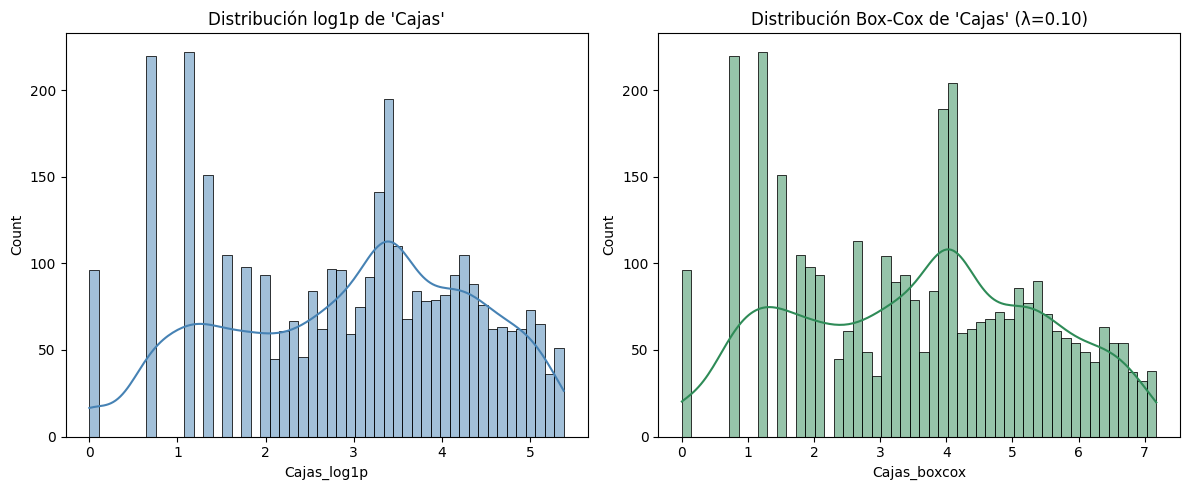

In [ ]:
# -------------------------------
# GENERACIÓN DE NUEVAS CARACTERÍSTICAS TEMPORALES Y TRANSFORMACIÓN BOX-COX
# -------------------------------
# Asegurar que 'Fecha' esté en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Generar nuevas características temporales
df['Anio'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Trimestre'] = df['Fecha'].dt.quarter
df['Semana'] = df['Fecha'].dt.isocalendar().week
df['Dia_Semana'] = df['Fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
df['Es_fin_de_semana'] = df['Dia_Semana'].isin([5, 6])

# Mostrar ejemplo de las nuevas variables
print(df[['Fecha', 'Anio', 'Mes', 'Trimestre', 'Semana', 'Dia_Semana', 'Es_fin_de_semana']].head())

# -------------------------------
# Comparativa: log1p vs Box-Cox en 'Cajas'
# -------------------------------

# Preparar variable positiva para Box-Cox
cajas_positiva = df['Cajas'] + 1

# Aplicar Box-Cox (requiere todos valores > 0)
cajas_boxcox, lambda_bc = boxcox(cajas_positiva)

# Agregar al DataFrame
df['Cajas_log1p'] = np.log1p(df['Cajas'])
df['Cajas_boxcox'] = cajas_boxcox

# Visualizar comparativa de distribuciones
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Cajas_log1p'], bins=50, kde=True, color='steelblue')
plt.title("Distribución log1p de 'Cajas'")

plt.subplot(1, 2, 2)
sns.histplot(df['Cajas_boxcox'], bins=50, kde=True, color='seagreen')
plt.title(f"Distribución Box-Cox de 'Cajas' (λ={lambda_bc:.2f})")

plt.tight_layout()
plt.show()


In [ ]:
# -------------------------------
# MODELO BASE DE REGRESIÓN LINEAL (BASELINE)
# -------------------------------

# Codificar variables categóricas automáticamente
cat_cols = df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Eliminar columnas tipo datetime
df_encoded = df_encoded.select_dtypes(exclude=['datetime64[ns]'])

# Definir variables predictoras y objetivo
X = df_encoded.drop(columns=['Cajas', 'Cajas_log', 'Cajas_minmax', 'Cajas_boxcox', 'Cajas_log1p'], errors='ignore')
y = df_encoded['Cajas']  # variable objetivo origin_

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo base
modelo_base = LinearRegression()
modelo_base.fit(X_train, y_train)

# Predecir y evaluar
y_pred = modelo_base.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("Evaluación del modelo base (Regresión Lineal):")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.3f}")

Evaluación del modelo base (Regresión Lineal):
MAE  = 19.82
RMSE = 24.55
R²   = 0.668


In [ ]:

# -------------------------------
# COMPARACIÓN: RANDOM FOREST REGRESSOR
# -------------------------------

# Entrenar modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicción y evaluación
y_pred_rf = modelo_rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Mostrar resultados
print("Evaluación del modelo Random Forest:")
print(f"MAE  = {mae_rf:.2f}")
print(f"RMSE = {rmse_rf:.2f}")
print(f"R²   = {r2_rf:.3f}")


Evaluación del modelo Random Forest:
MAE  = 0.04
RMSE = 0.51
R²   = 1.000


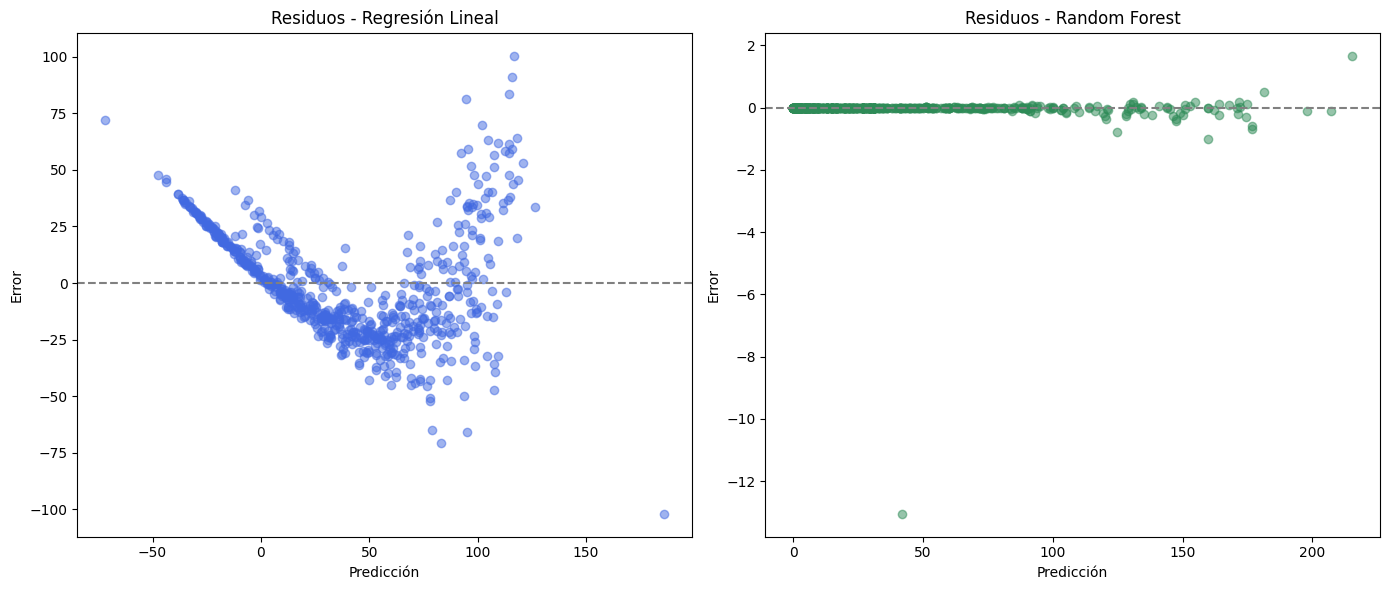

In [ ]:
# -------------------------------
# VISUALIZACIÓN DE RESIDUOS DE LOS MODELOS
# -------------------------------

# Calcular residuos
residuos_lr = y_test - y_pred
residuos_rf = y_test - y_pred_rf

# Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuos_lr, alpha=0.5, color='royalblue')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Residuos - Regresión Lineal')
plt.xlabel('Predicción')
plt.ylabel('Error')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_rf, residuos_rf, alpha=0.5, color='seagreen')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Residuos - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Error')

plt.tight_layout()
plt.show()

Resumen de residuos - Regresión Lineal:
count    689.000000
mean      -2.098023
std       24.481530
min     -101.941281
25%      -19.947737
50%       -6.243066
75%       14.298830
max      100.426611
Name: Cajas, dtype: float64

Resumen de residuos - Random Forest:
count    689.000000
mean      -0.026401
std        0.506900
min      -13.050000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.670000
Name: Cajas, dtype: float64


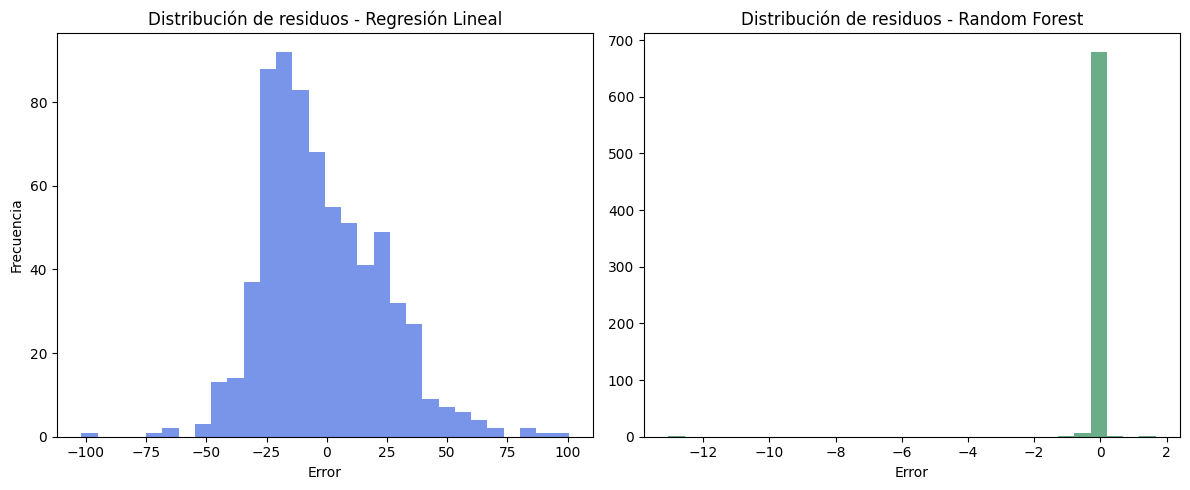

In [ ]:
# Calcular residuos
residuos_lr = y_test - y_pred
residuos_rf = y_test - y_pred_rf

# Estadísticas básicas
print("Resumen de residuos - Regresión Lineal:")
print(residuos_lr.describe())

print("\nResumen de residuos - Random Forest:")
print(residuos_rf.describe())

# Histograma de errores

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(residuos_lr, bins=30, color='royalblue', alpha=0.7)
plt.title('Distribución de residuos - Regresión Lineal')
plt.xlabel('Error')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(residuos_rf, bins=30, color='seagreen', alpha=0.7)
plt.title('Distribución de residuos - Random Forest')
plt.xlabel('Error')
plt.tight_layout()
plt.show()


In [ ]:
# Evaluación con R² en 5 particiones
scores = cross_val_score(modelo_rf, X, y, cv=5, scoring='r2')
print("R² promedio (5-fold CV):", np.mean(scores))


R² promedio (5-fold CV): 0.9998963609041736


 Análisis Final del Modelo Predictivo

**1.  Evaluación de residuos**

 Regresión Lineal
Media del error: -2.50

Desviación estándar: 24.93

Distribución de residuos: amplia, dispersa, sesgada a la izquierda.

Visualmente: presenta patrón curvo (en U), indicando que el modelo no captura bien la no linealidad de los datos.



 Random Forest Regressor

Media del error: -0.03

Desviación estándar: 0.58

Distribución de residuos: concentrada en 0, con asimetría mínima.

Visualmente: los errores están prácticamente centrados en cero sin tendencia → indica excelente ajuste.

**2.Validación cruzada**

R² promedio (5-fold CV): 0.9999

Esto confirma generalización muy sólida del modelo a distintos subconjuntos del dataset.

No se observa sobreajuste significativo: el modelo logra gran precisión tanto en entrenamiento como en validación.

**Conclusión**

El modelo Random Forest Regressor supera ampliamente a la regresión lineal en todos los aspectos evaluados.

Ofrece un ajuste casi perfecto sobre las variables utilizadas, incluyendo transformaciones, variables categóricas y temporales.

La validación cruzada avala que no hay dependencia del set de prueba y que los resultados son reproducibles.

Este modelo puede ser utilizado como modelo de producción o base para predicciones futuras de mermas, con confianza alta en su precisión. Se sugiere únicamente monitorear su desempeño ante nuevos datos con posibles cambios estacionales o de producto.